# Preamble

In [1]:
from scripts.open_preprocess_racmo import *
from scripts.paths import *
from scripts.dicts import *


import matplotlib.pyplot as plt
import plotly.graph_objects as go
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import matplotlib.patches as patches

from sum_freshwater_func import *
from per_source.King2020 import df_D_King_annual_GrIS, df_D_King_monthly_GrIS ,ds_D_king_per_basin_sum
from per_source.Karlsson2021_Basal_Melt import df_Basal_GrIS_monthly, df_Basal_basin_monthly, df_Basal_GrIS_annual

pathFigures = pathGithubFolder+ "results/figures/"

import pandas as pd

Pathdata: /Volumes/imau01/rapid/RACMO2.3p2/FGRN055
Reading locally reprojected 1k data
Finished reading locally reprojected 1k data
Opening file: 
 /Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/runoff.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz
... 
/Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/runoff.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annu

/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/src/open_datasets/sum_freshwater_func.py:788: RuntimeWarning: invalid value encountered in cast
  array_dates = np.empty(len(data_array)).astype('datetime64[ns]')
/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/src/open_datasets/sum_freshwater_func.py:798: RuntimeWarning: invalid value encountered in cast
  array_dates = np.empty(len(data_array)).astype('datetime64[ns]')
/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/src/open_datasets/per_source/King2020.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds_D_king_xlsx = pd.read_excel(pathKing, header=[0,3], index_col=0, parse_dates=True)
/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-

Sum is 23.3 km3/yr


# Greenland as a whole

## Annual

## Comparison 500m vs 1 km

Text(0.5, 0.98, 'RACMO runoff 2023')

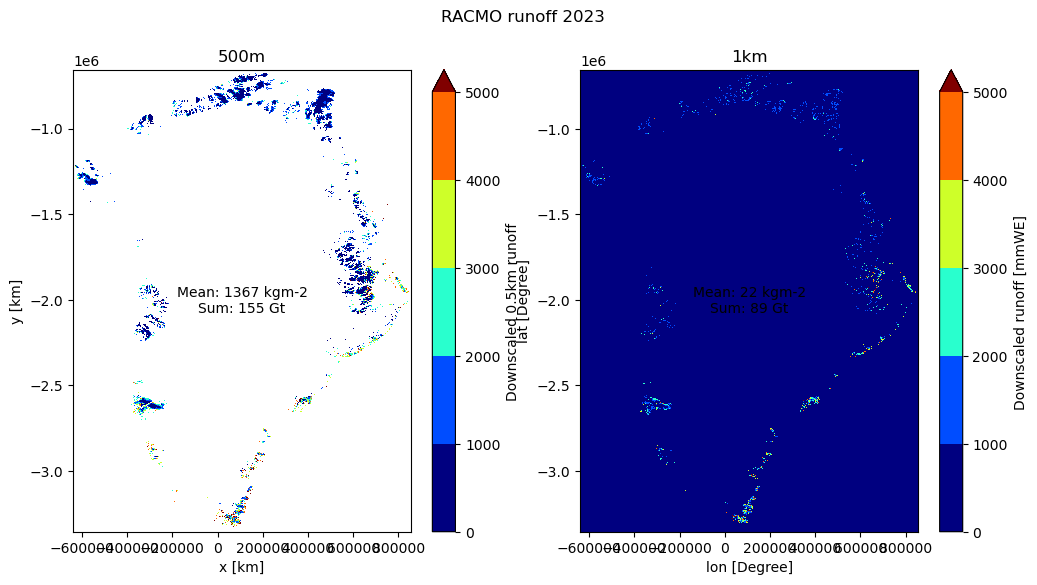

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

levels= np.arange(0,6000, 1e3)
dsRunoff500mRACMO_GIC.sel(time='2023')['runoffcorr'].plot(ax=ax[0],  cmap='jet', levels=levels)
dsRunoff_RACMO_1k_YY_GIC.sel(time='2023').plot(ax=ax[1],cmap='jet', levels=levels)
# give title 500m and 1km
ax[0].set_title('500m')
ax[1].set_title('1km')
# add meanv value in the middle of the plot

ax[0].text(0.5, 0.5, f'Mean: {dsRunoff500mRACMO_GIC.sel(time='2023')['runoffcorr'].mean().values:.0f} kgm-2\nSum: {dsRunoff500mRACMO_GIC.sel(time='2023')['runoffcorr'].sum().values/1e6/4:.0f} Gt',
horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
ax[1].text(0.5, 0.5, f'Mean: {dsRunoff_RACMO_1k_YY_GIC.sel(time='2023').mean().values:.0f} kgm-2\nSum: {dsRunoff_RACMO_1k_YY_GIC.sel(time='2023').sum().values/1e6:.0f} Gt',
 horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

fig.suptitle('RACMO runoff 2023')


In [2]:
# calculate error GrIS

# Select the time range for each dataset
dsRunoff500mRACMO_GrIS_sum_selected = dsRunoff500mRACMO_GrIS_sum.sel(time=slice('1958', '2023'))
dsRunoff500mMAR_GrIS_sum_selected = dsRunoff500mMAR_GrIS_sum.sel(time=slice('1958', '2023'))
dsRunoff_RACMO_1k_YY_GrIS_sum_selected = dsRunoff_RACMO_1k_YY_GrIS_sum.sel(time=slice('1958', '2023'))

# mean_GrIS = np.mean(np.concatenate([(dsRunoff_RACMO_1k_YY_GrIS_sum_selected).to_numpy()]))




In [3]:
dsRunoff500mRACMO_GrIS_sum_selected

<xarray.Dataset> Size: 792B
Dimensions:     (time: 66)
Coordinates:
  * time        (time) datetime64[ns] 528B 1958-06-30T18:00:00 ... 2023-06-30...
Data variables:
    runoffcorr  (time) float32 264B 319.0 287.5 346.7 ... 399.0 340.0 423.0
Attributes:
    units:    km3 w.e.

In [5]:

ds_run_RACMO = open_compressed_xarray(folder_MARRACMO1km+ "runoff.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz")
ds_run_RACMO['years_since_19580115'] = ds_run_RACMO.time
ds_run_RACMO['time'] = convert_years_to_date(ds_run_RACMO['years_since_19580115'], '1958-01-15')
ds_runoff_RACMO_mean = ds_run_RACMO.sum(dim=['time'])
ds_runoff_RACMO_mean['section_numbers_adjusted'] = ds_runoff_RACMO_mean['runoffcorr'].copy(deep=True)
ds_runoff_RACMO_mean['section_numbers_adjusted'].values = ds_adj_sect['section_numbers_adjusted'].values

for var in ds_masks1k.data_vars:
    ds_runoff_RACMO_mean[var] = ds_runoff_RACMO_mean['runoffcorr'].copy(deep=True)
    ds_runoff_RACMO_mean[var].values = ds_masks1k[var].values
ds_run_RACMO_GrIS_basin = (ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['GrIS']==1).groupby(ds_runoff_RACMO_mean['section_numbers_adjusted']).sum()/1e6)
ds_run_RACMO_GIC_basin = (ds_run_RACMO['runoffcorr'].where(ds_runoff_RACMO_mean['GIC']==1).groupby(ds_runoff_RACMO_mean['section_numbers_adjusted']).sum()/1e6)



In [6]:
# select time between 1991 and 2022 for dsPrecipFjordsVolSum and dsPrecipFjordsCARRA_Annual_Sum
dsPrecipFjordsVolSum_selected = dsPrecipFjordsVolSum.sel(time=slice('1991', '2022'))['precipcorr'].to_numpy()
dsPrecipFjordsCARRA_Annual_Sum_selected = dsPrecipFjordsCARRA_Annual_Sum.sel(time=slice('1991', '2022'))['precip'].to_numpy()

err_ratio_precip = ((dsPrecipFjordsVolSum_selected/dsPrecipFjordsCARRA_Annual_Sum_selected)-1).mean()
mean_precip = np.concatenate([dsPrecipFjordsVolSum_selected, dsPrecipFjordsCARRA_Annual_Sum_selected]).mean()
print(f'Error ratio precip: {err_ratio_precip:.2f}')
print("Mean precip: ", mean_precip)

mean_GrIS = np.mean(np.concatenate([ ds_run_MAR_GrIS_basin.sum(dim='section_numbers_adjusted').to_numpy(), ds_run_RACMO_GrIS_basin.sum(dim='section_numbers_adjusted').to_numpy(), dsRunoff_RACMO_1k_YY_GrIS_sum.to_numpy()]))   

mean_GIC = np.mean(np.concatenate([ds_run_MAR_GIC_basin.sum(dim='section_numbers_adjusted').to_numpy(), ds_run_RACMO_GIC_basin.sum(dim='section_numbers_adjusted').to_numpy(), dsRunoff_RACMO_1k_YY_GIC_sum.to_numpy()]))

err_ratio_GrIS = 0.051   #5.1 % difference mean between racmo and mar 1km 
err_ratio_GIC = 0.055  #5.5 % difference mean between racmo and mar 1km 
print(f'Error ratio GIC: {err_ratio_GIC:.2f}')
print(f"Mean GIC: {mean_GIC:.2f}")


Error ratio precip: 0.18
Mean precip:  49.851507408200504
Error ratio GIC: 0.06
Mean GIC: 59.83


# Figure 2: Time series annual everything

RuntimeError: Input/output error

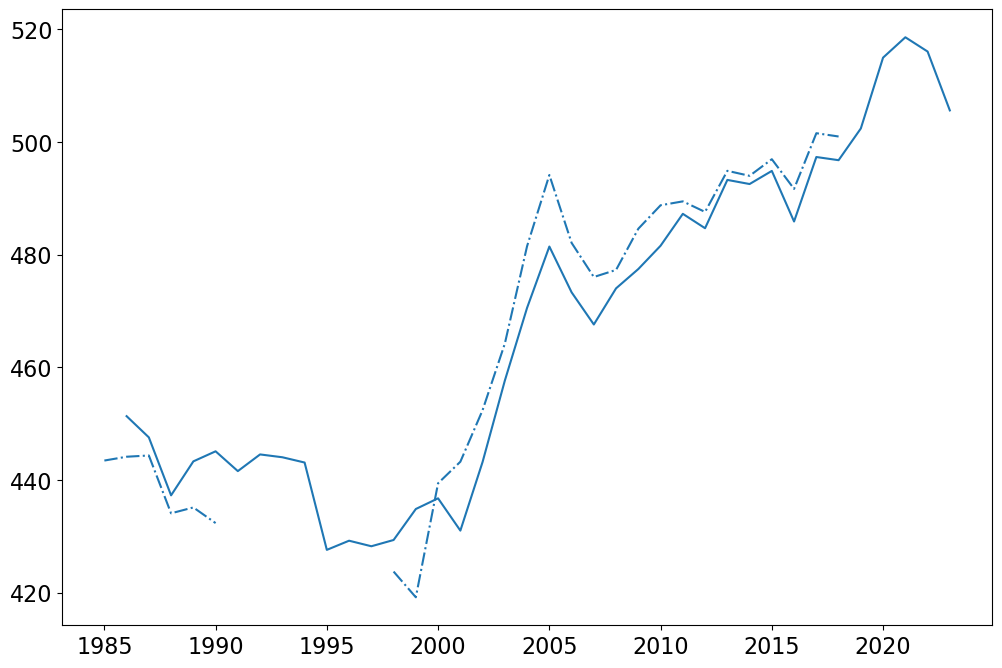

In [113]:

# increase font size
plt.rcParams.update({'font.size': 16})


dsPrecipFjordsCARRA_Annual_Sum = (ds_precip_carra_1991_2023_sum.sum(dim="section_numbers_adjusted")).resample(time='YS').sum()


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# ax.fill_between(pd.to_datetime(dfGISDMankoff.index, format='%Y'), (dfGISDMankoff - dfErrorGISDMankoff.values).squeeze().to_numpy(),(dfGISDMankoff + dfErrorGISDMankoff.values).squeeze().to_numpy(), alpha=0.1, color = dictFWcolor['Solid'])

def dt_year(ds):
    return pd.to_datetime(ds.time.dt.year,format='%Y')

# Solid ice discharge
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, label='Solid ice discharge (Mankoff2019)', color = dictFWcolor['Solid'], zorder=10)
ax.plot(df_D_King_annual_GrIS.index, df_D_King_annual_GrIS, label='Solid ice discharge (King2020)', color = dictFWcolor['Solid'], linestyle='-.', zorder=10)

# Runoff GrIS
ax.plot(dt_year(dsRunoff_RACMO_1k_YY_GrIS_sum), dsRunoff_RACMO_1k_YY_GrIS_sum, label="GrIS runoff (RACMO)", color='tab:orange', linestyle = '-')
ax.plot(dt_year(ds_run_MAR_GrIS_basin), ds_run_MAR_GrIS_basin.sum(dim='section_numbers_adjusted'), label = "GrIS runoff (MAR)", color=dictFWcolor['IceRun'], linestyle = '--')
# ax.plot(dt_year(dsRunoff500mRACMO_GrIS_sum), dsRunoff500mRACMO_GrIS_sum['runoffcorr'], label="GrIS runoff (RACMO 500m)", color=dictFWcolor['IceRun'])
# ax.plot(dt_year(dsRunoff500mMAR_GrIS_sum), dsRunoff500mMAR_GrIS_sum['runoffcorr'], label="GrIS runoff (MAR 500m)", color=dictFWcolor['IceRun'], linestyle ="--")
# ax.plot(dt_year(dsRunoff500mRACMO_GIC_sum), dsRunoff500mRACMO_GIC_sum['runoffcorr'], label="GIC Runoff (RACMO 500m)", color=dictFWcolor['IceCap'])

ax.plot(dt_year(dsRunoff_RACMO_1k_YY_GIC_sum), dsRunoff_RACMO_1k_YY_GIC_sum, label="GIC runoff (RACMO)", color='plum', linestyle = '-')
# ax.plot(dt_year(dsRunoff500mMAR_GIC_sum), dsRunoff500mMAR_GIC_sum['runoffcorr'], label="GIC runoff (MAR 500m)", color=dictFWcolor['IceCap'], linestyle ="--")
ax.plot(dt_year(ds_run_MAR_GIC_basin), ds_run_MAR_GIC_basin.sum(dim='section_numbers_adjusted'), label = "GIC runoff (MAR)",color=dictFWcolor['IceCap'], linestyle = '--')

ax.plot(dt_year(dsRunoffTundraSum), dsRunoffTundraSum, label="Tundra runoff (RACMO)", color=dictFWcolor['Tundra'])

# Precipitation
ax.plot(dsPrecipFjordsVolSum.time, dsPrecipFjordsVolSum['precipcorr'], label="Precipitation (RACMO)", color=dictFWcolor['Precip'])
ax.plot(dsPrecipFjordsCARRA_Annual_Sum.time, dsPrecipFjordsCARRA_Annual_Sum['precip'], label="Precipitation (CARRA)", color=dictFWcolor['Precip'], linestyle=":")

# Basal melt
ax.plot(basal_date_range, np.repeat(df_Basal_GrIS_annual, len(basal_date_range)), label="Basal melt", color=dictFWcolor['Basal'], linestyle=(5, (10, 3)))


errorbar_loc = 600
errorbar_loc_x = np.round(np.linspace(1989,1999,6)).astype(int)
ax.errorbar(pd.to_datetime(str(errorbar_loc_x[0])), errorbar_loc, yerr=dfErrorGISDMankoff.mean(), fmt='o', markersize=0.1,  color=dictFWcolor['Solid'], capsize=5)
ax.errorbar(pd.to_datetime(str(errorbar_loc_x[1])), errorbar_loc, yerr=mean_GrIS*err_ratio_GrIS, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['IceRun'])
ax.errorbar(pd.to_datetime(str(errorbar_loc_x[2])), errorbar_loc, yerr=dsRunoffTundraSum.mean().values*0.10, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['Tundra'])
ax.errorbar(pd.to_datetime(str(errorbar_loc_x[3])), errorbar_loc, yerr=mean_GIC*err_ratio_GIC, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['IceCap'])
ax.errorbar(pd.to_datetime(str(errorbar_loc_x[4])), errorbar_loc, yerr=mean_precip*err_ratio_precip/2, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['Precip'])
ax.errorbar(pd.to_datetime(str(errorbar_loc_x[5])), errorbar_loc, yerr=4.4, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['Basal'])

rect_x_start = mdates.date2num(pd.to_datetime(str(errorbar_loc_x[0]-2)))
rect_x_end = mdates.date2num(pd.to_datetime(str(errorbar_loc_x[-1]+2)))  # 20 years later
rect_width = rect_x_end - rect_x_start
rect = patches.Rectangle((rect_x_start, 520), rect_width, 160, linewidth=1, edgecolor='k', facecolor='white')
ax.add_patch(rect)



# set xlim for first 1939 to 2024
ax.set_ylim([0, 800])
years_xlim = [1940, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])

ax.grid(alpha=0.2)
ax.set_ylabel(r"Mass loss (Gt yr$^{-1}$)")
ax.legend(ncols=1, fontsize=14) #bbox_to_anchor=(1.02, 1), loc='upper left',

pathFigures = pathGithubFolder+ "results/figures/"
# plt.savefig(pathFigures + f"Annual timeseries/Annual_{years_xlim[0]}-{years_xlim[1]}_with_error_bars_v3.png", dpi=300, bbox_inches='tight')
plt.show()

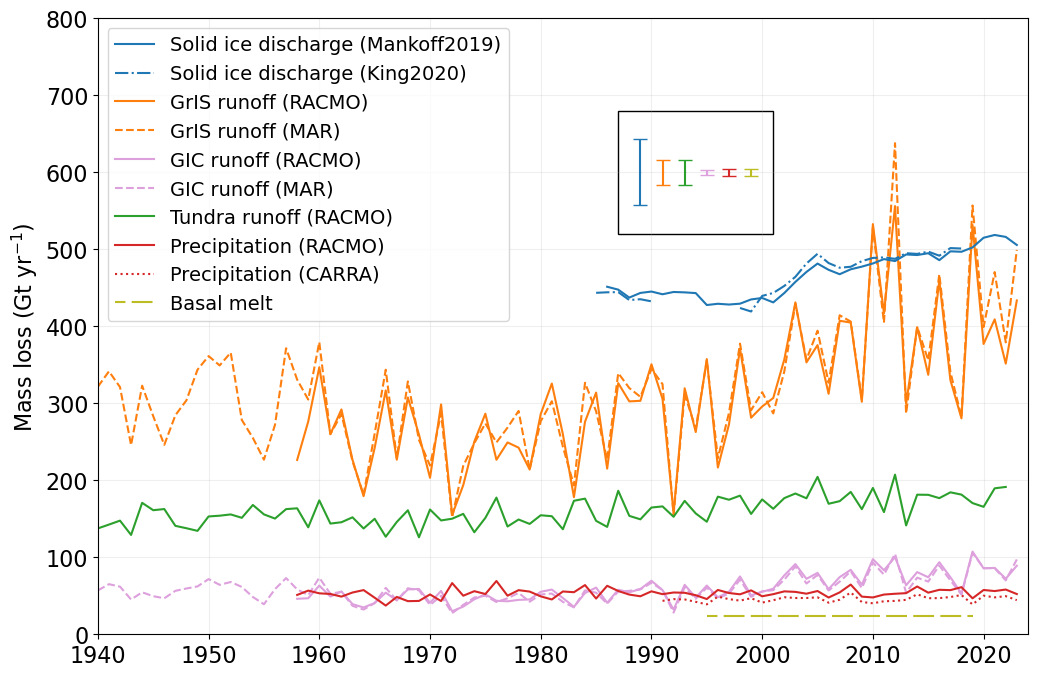

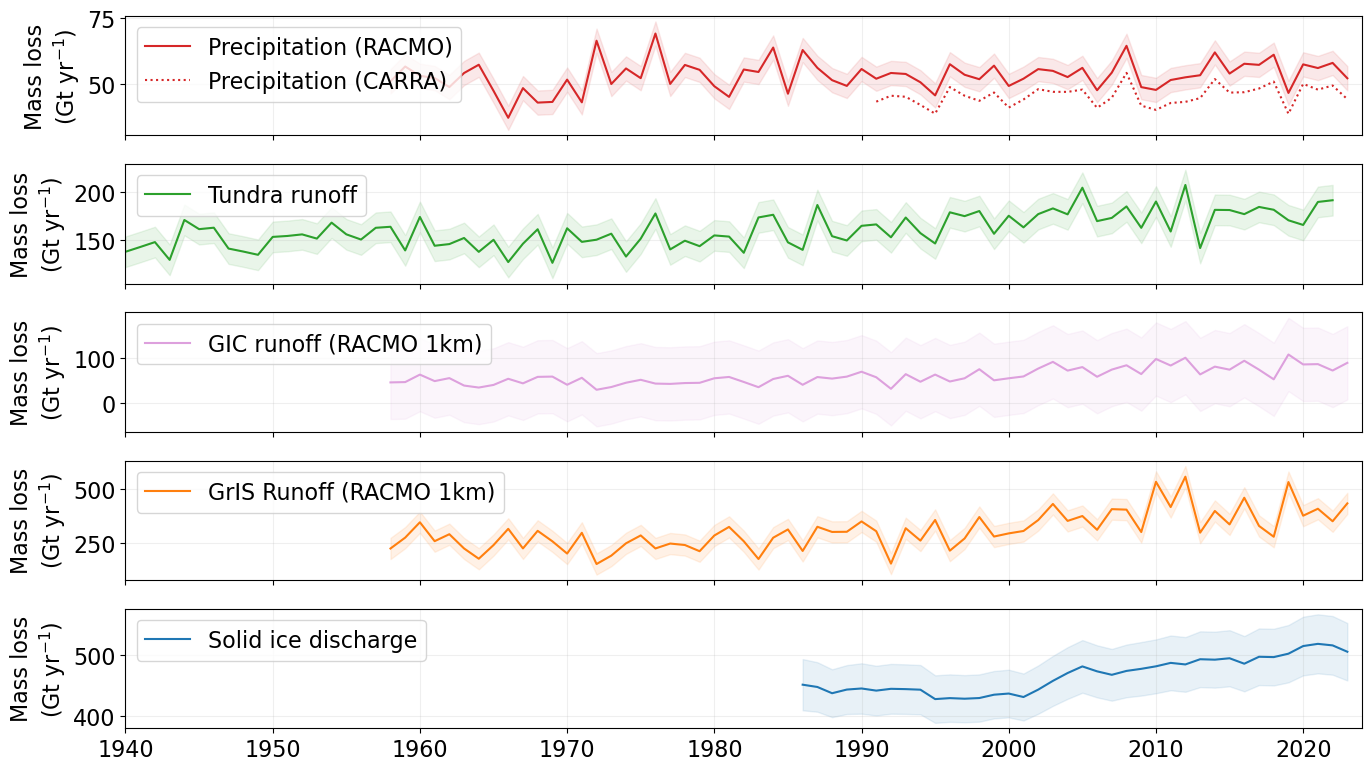

In [29]:
# Increase font size
plt.rcParams.update({'font.size': 16})

dsPrecipFjordsCARRA_Annual_Sum = (ds_precip_carra_1991_2023_sum.sum(dim="section_numbers_adjusted")).resample(time='YS').sum()

# Create multiple subplots for each line of plotting
fig, axes = plt.subplots(5, 1, figsize=(14, 8), sharex=True, sharey=False)

# Function to convert datetime
def dt_year(ds):
    return pd.to_datetime(ds.time.dt.year, format='%Y')

# Data and labels for plots
plot_data = [
    (dsPrecipFjordsVolSum.time, dsPrecipFjordsVolSum['precipcorr'], "Precipitation (RACMO)", dictFWcolor['Precip'], mean_precip*err_ratio_precip/2),
    (dt_year(dsRunoffTundraSum), dsRunoffTundraSum, "Tundra runoff", dictFWcolor['Tundra'], dsRunoffTundraSum.mean().values * 0.1),
    (dt_year(dsRunoff_RACMO_1k_YY_GIC_sum), dsRunoff_RACMO_1k_YY_GIC_sum, "GIC runoff (RACMO 1km)", 'plum', mean_GIC * err_ratio_GIC),
    (dt_year(dsRunoff_RACMO_1k_YY_GrIS_sum), dsRunoff_RACMO_1k_YY_GrIS_sum, "GrIS Runoff (RACMO 1km)", 'tab:orange', mean_GrIS * 0.15),
    (pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, "Solid ice discharge", dictFWcolor['Solid'], dfErrorGISDMankoff.values),
]

# Loop through axes and plot each dataset
for i, ax in enumerate(axes):
    time, data, label, color, error = plot_data[i]
    ax.plot(time, data, label=label, color=color)
    if error is not None:
        
        ax.fill_between(time, np.squeeze((data-error).values),np.squeeze((data+error).values), color=color, alpha=0.1)
    ax.set_ylabel(r"Mass loss"+"\n"+"(Gt yr$^{-1}$)")
    ax.legend(loc='upper left')
    ax.grid(alpha=0.2)

# Precipitation (CARRA) added to the first subplot
axes[0].plot(dsPrecipFjordsCARRA_Annual_Sum.time, dsPrecipFjordsCARRA_Annual_Sum['precip'], label="Precipitation (CARRA)", color=dictFWcolor['Precip'], linestyle=":")
axes[0].legend(loc='upper left')

# Set common xlim for all plots
axes[-1].set_xlim([pd.Timestamp("1940-01-01"), pd.Timestamp("2023-12-31")])

# Set common xlabel for the subplots
axes[-1].set_xlabel("")

plt.tight_layout()
# remove top and right spine and reduce space betweeen subplots


# Save the figure
# plt.savefig(pathFigures + f"Annual timeseries/Annual_subplots{years_xlim[0]}-{years_xlim[1]}_with_error_bars.png", dpi=300, bbox_inches='tight')

plt.show()


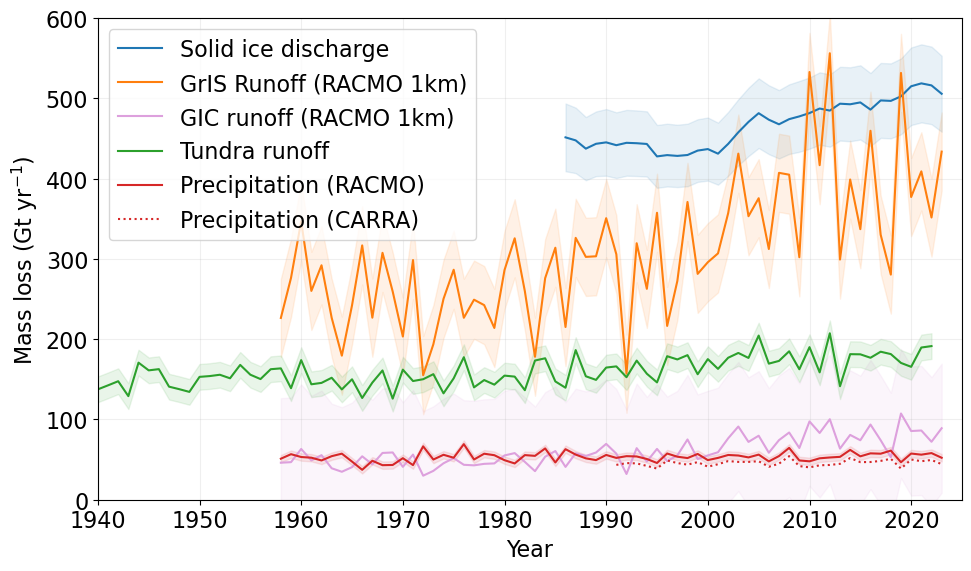

In [38]:
import matplotlib.pyplot as plt

# Increase font size
plt.rcParams.update({'font.size': 16})
pathFigures_Step_by_step = pathGithubFolder+ "results/figures/Annual timeseries/step_by_step/"


# Preprocessing the dataset
dsPrecipFjordsCARRA_Annual_Sum = (ds_precip_carra_1991_2023_sum
                                  .sum(dim="section_numbers_adjusted")
                                  .resample(time='YS').sum())

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim([0,600])

# Function to convert datetime
def dt_year(ds):
    return pd.to_datetime(ds.time.dt.year, format='%Y')
ax.set_xlim([pd.to_datetime("1940" ), pd.to_datetime("2025")])

# Data and labels for plots
plot_data = [
    (dsPrecipFjordsVolSum.time, dsPrecipFjordsVolSum['precipcorr'], "Precipitation (RACMO)", dictFWcolor['Precip'], mean_precip*err_ratio_precip/2),
    (dt_year(dsRunoffTundraSum), dsRunoffTundraSum, "Tundra runoff", dictFWcolor['Tundra'], dsRunoffTundraSum.mean().values * 0.1),
    (dt_year(dsRunoff_RACMO_1k_YY_GIC_sum), dsRunoff_RACMO_1k_YY_GIC_sum, "GIC runoff (RACMO 1km)", 'plum', mean_GIC * err_ratio_GIC),
    (dt_year(dsRunoff_RACMO_1k_YY_GrIS_sum), dsRunoff_RACMO_1k_YY_GrIS_sum, "GrIS Runoff (RACMO 1km)", 'tab:orange', mean_GrIS * 0.15),
    (pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, "Solid ice discharge", dictFWcolor['Solid'], dfErrorGISDMankoff.values),
]

# Add and save each line incrementally
for i, (time, data, label, color, error) in enumerate(plot_data[::-1]):
    ax.plot(time, data, label=label, color=color)
    
    if error is not None:
        ax.fill_between(time, np.squeeze((data-error).values),np.squeeze((data+error).values), color=color, alpha=0.1)
    
    # Add labels and legend after each line is plotted
    ax.set_ylabel(r"Mass loss (Gt yr$^{-1}$)")
    ax.set_xlabel("Year")
    ax.legend(loc='upper left')
    ax.grid(alpha=0.2)
    
    # Save the figure after each line is added
    plt.tight_layout()
    plt.savefig(f"{pathFigures_Step_by_step}plot_step_{i+1}.png", dpi=300)

# Finally, add the Precipitation (CARRA) line and save the final figure
ax.plot(dsPrecipFjordsCARRA_Annual_Sum.time, dsPrecipFjordsCARRA_Annual_Sum['precip'], label="Precipitation (CARRA)", color=dictFWcolor['Precip'], linestyle=":")
ax.legend(loc='upper left')

# Save the final plot
plt.tight_layout()
plt.savefig(f"{pathFigures_Step_by_step}plot_step_{i+1}.png", dpi=300)


# Show the final plot
plt.show()


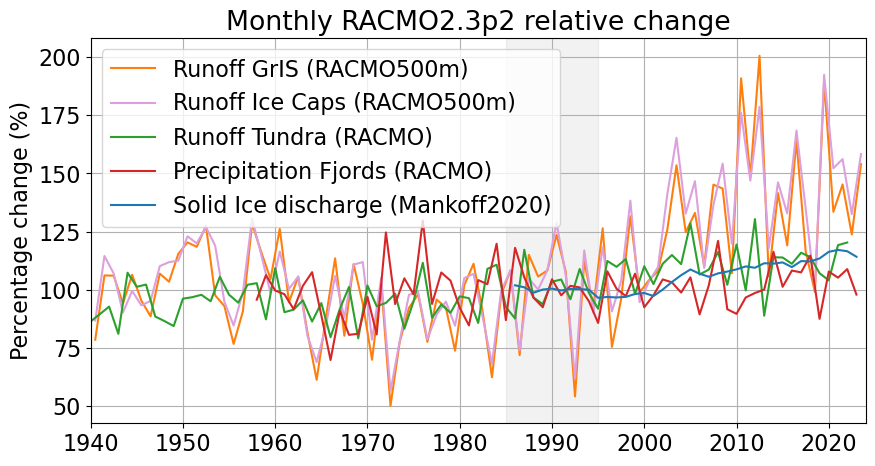

In [10]:
# Calculate the 10-year average
avg_10yr_RACMO = dsRunoff500mRACMO_GrIS_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_RACMO_GIC = dsRunoff500mRACMO_GIC_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Tundra = dsRunoffTundraSum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Precip = dsPrecipFjordsVolSum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Solid = dfGISDMankoff.loc[1985:1995].mean()

# Calculate the percentage change
pct_change_RACMO = (dsRunoff500mRACMO_GrIS_sum ) / avg_10yr_RACMO * 100
pct_change_RACMO_GIC = (dsRunoff500mRACMO_GIC_sum ) / avg_10yr_RACMO_GIC * 100
pct_change_Tundra = (dsRunoffTundraSum ) / avg_10yr_Tundra * 100
pct_change_Precip = (dsPrecipFjordsVolSum ) / avg_10yr_Precip * 100
pct_change_Solid = (dfGISDMankoff ) / avg_10yr_Solid * 100

# Plot the percentage change
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(pct_change_RACMO.time, pct_change_RACMO['runoffcorr'], label="Runoff GrIS (RACMO500m)", color=dictFWcolor['IceRun'])
ax.plot(pct_change_RACMO_GIC.time, pct_change_RACMO_GIC['runoffcorr'], label="Runoff Ice Caps (RACMO500m)", color=dictFWcolor['IceCap'])
ax.plot(pct_change_Tundra.time, pct_change_Tundra, label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])
ax.plot(pct_change_Precip.time, pct_change_Precip['precipcorr'], label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'),  pct_change_Solid, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])

# shade area between 1985 and 1995
ax.axvspan(pd.Timestamp('1985-01-01'), pd.Timestamp('1994-12-31'), color='gray', alpha=0.1)


years_xlim = [1940, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])
ax.set_ylabel("Percentage change (%)")
ax.legend()
ax.set_title(f"{time_resolution} RACMO2.3p2 relative change")

ax.grid()
plt.show()

### Combine data

In [14]:
# dfPrecipFjordsCARRA.index = dfPrecipFjordsCARRA.index.year
# dfRunoff500mMAR_GIC_sum.index = dfRunoff500mMAR_GIC_sum.index.year
# dfRunoff500mRACMO_GIC.index = dfRunoff500mRACMO_GIC.index.year
# dfRunoff_RACMO_1k_YY_GIC_sum.index = dfRunoff_RACMO_1k_YY_GIC_sum.index.year
# dfRunoff500mMAR_GrIS_sum.index = dfRunoff500mMAR_GrIS_sum.index.year
# dfRunoff500mRACMO_GrIS_sum.index = dfRunoff500mRACMO_GrIS_sum.index.year
# dfRunoff_RACMO_1k_YY_GrIS_sum.index = dfRunoff_RACMO_1k_YY_GrIS_sum.index.year


# df_sum_GIS_55 = pd.concat(
#     [
#         dfSolidMankoff,
#         dfRunoff_RACMO_1k_YY_GIC_sum,
#         dfRunoff_RACMO_1k_YY_GrIS_sum,
#         dfRunoffTundra,
#         dfPrecipFjordsVol,
#         dfPrecipFjordsCARRA,
#         dfRunoff500mMAR_GIC_sum,
#         dfRunoff500mMAR_GrIS_sum,
#         dfRunoff500mRACMO_GrIS_sum,
#         dfRunoffRACMOGrIS,
#         dfRunoffRACMOGIC,


#     ],
#     axis=1,
# ).sort_index()

# if time_resolution == "Monthly":
#     df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format="%Y-%m")
# else:
#     df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format="%Y")

# filterNanMonths = (
#     df_sum_GIS_55.isna().sum(axis=1) > 0
# )  # find months with NaN values in any of the variables
# df_sum_GIS_55Relative = (df_sum_GIS_55.iloc[:, :5].mask(filterNanMonths).T / df_sum_GIS_55.iloc[:, :5].sum(axis=1)).T


In [38]:
df_sum_GIS_55.columns

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# FW_type_long = ['Discharge [Gt yr-1]', 'Runoff GrIS', 'Runoff Tundra',
#        'Precipitation Fjords', 'Runoff GIC']
# dictFWcolor_long = dict(zip(FW_type_long, colors))


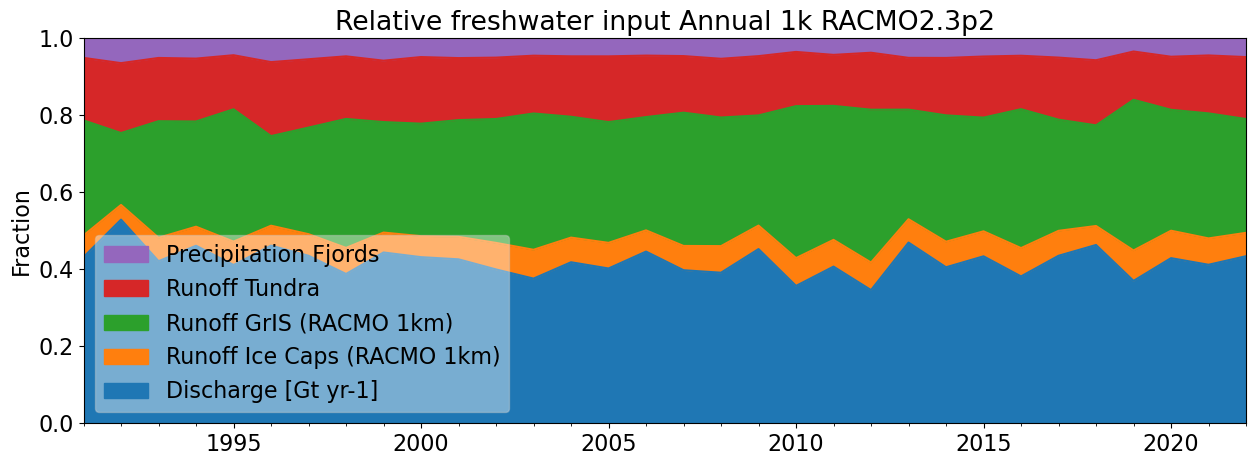

In [26]:
import matplotlib.dates as mdates
from scipy import stats

time_resolution = 'Annual'

fig,ax = plt.subplots( figsize=(15, 5))
# df_sum_GIS_55.plot(kind='line', subplots=True, figsize=(10, 6))
# set colors according to dictFWcolor

df_sum_GIS_55Relative['1986':'2022'].plot(kind='area',stacked=True, ax=ax)#color=[dictFWcolor_long[FW] for FW in df_sum_GIS_55Relative.columns])

# df_sum_GIS_55Relative.plot(kind='bar', ax=ax, stacked=True)
# max 10 ticklabels

# update figsize
# plt.subplots( figsize=(15, 5))
# plt.xticks(rotation=45)
plt.title(f"Relative freshwater input {time_resolution} {spatial_resolution} RACMO2.3p2")
plt.ylabel("Fraction")
# do legend inverse
handles, labels = ax.get_legend_handles_labels()
# WHITE TEXT IN LEGEND
# for text in leg.get_texts(
ax.legend(reversed(handles), reversed(labels), framealpha=0.4, )


# xlim 1991
ax.set_xlim([pd.Timestamp('1991-01-01'), pd.Timestamp('2022-12-31')])
ax.set_ylim([0, 1]) 
plt.show()



In [34]:


fig = go.Figure()

# Add linear trend
for col in df_sum_GIS_55.columns:
    x = df_sum_GIS_55['1970':].index.year
    y = df_sum_GIS_55['1970':][col].values

    x= x[~np.isnan(y)]
    y= y[~np.isnan(y)]

    # Add the original data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
    
    # Calculate the linear trend
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'p-value for {col} trend: {p_value}')
    
    # Add the trendline
    fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f}%/decade \np={p_value:.3f}', line=dict( dash='dash', color='grey')))

# update lyaout to plotly white
fig.update_layout(template='plotly_white', title=f"FW input {time_resolution} RACMO2.3p2", width = 1000, height = 500)
# fig.write_image(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_trend.png")
# fig.write_html(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_trend.html")
fig.show()

p-value for Discharge [Gt yr-1] trend: 2.6641035944098496e-14
p-value for Runoff Ice Caps (RACMO 1km) trend: 4.945213580809934e-12
p-value for Runoff GrIS (RACMO 1km) trend: 4.845627646429324e-09
p-value for Runoff Tundra trend: 1.318271485275408e-06
p-value for Precipitation Fjords trend: 0.722981972176633
p-value for Precipitation Fjords (CARRA) trend: 0.1257273551907334
p-value for Runoff Ice Caps (MAR 500m) trend: 6.127932334737862e-11
p-value for Runoff GrIS (MAR 500m) trend: 2.378626421100962e-09
p-value for Runoff GrIS (RACMO 500m) trend: 7.447362331499465e-09
p-value for Runoff GrIS trend: 7.447362331499465e-09
p-value for Runoff Ice Caps trend: 2.3265338718735604e-11


In [35]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Add linear trend
for col in df_sum_GIS_55Relative.columns:
    x = df_sum_GIS_55Relative.index.year
    y = df_sum_GIS_55Relative[col].values*100

    x= x[~np.isnan(y)]
    y= y[~np.isnan(y)]

    # Add the original data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
    
    # Calculate the linear trend
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'p-value for {col} trend: {p_value}')
    
    # Add the trendline
    fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f}%/decade \np={p_value:.3f}', line=dict( dash='dash')))

# update lyaout to plotly white
fig.update_layout(template='plotly_white', title=f"Relative FW input {time_resolution} RACMO2.3p2", width = 1000, height = 500)
fig.show()

p-value for Discharge [Gt yr-1] trend: 0.12545218231806757
p-value for Runoff Ice Caps (RACMO 1km) trend: 0.001597201644502247
p-value for Runoff GrIS (RACMO 1km) trend: 0.04012152598181766
p-value for Runoff Tundra trend: 0.001625260827936808
p-value for Precipitation Fjords trend: 0.013125734326164668


# Per sector

# Figure 4

------> NO
------> NW
------> NE
------> CW
------> CE
------> SW
------> SE


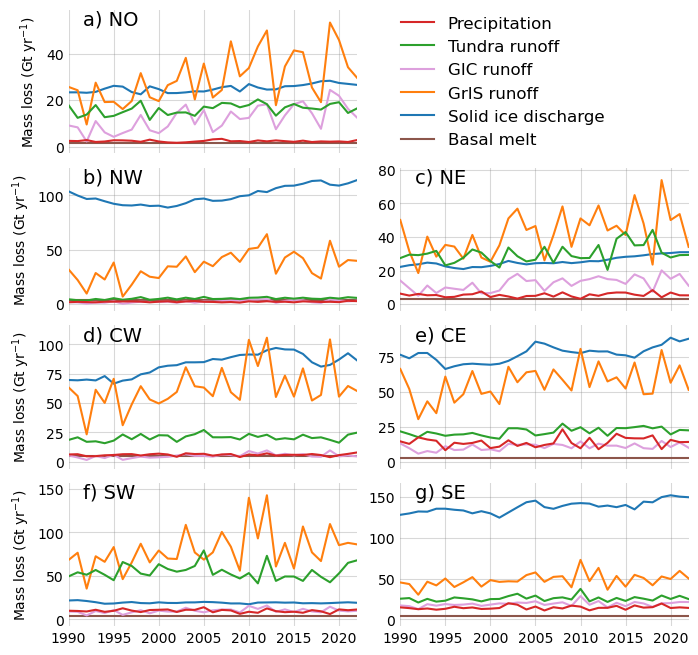

In [133]:
dictFWcolor['Basal melt'] = dict_colors_FW['Basal melt']

col_order_yearly = col_order_rel

pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=False)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector =(dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly].resample(time='YS').mean() * 12).sel(time=slice('1990', '2022')).sel(Basins=basin).to_dataframe().drop(columns='Basins')      

    print("------> " + basin)
    for var in df_single_sector.columns:
        linestyle = dict_linestyle_FW[var]
        df_single_sector[var].plot(kind='line', ax=ax, legend=False, color=dict_colors_FW[var])

    ax.grid(color = 'gray',alpha = 0.3)
    ymax = df_single_sector.max().max()*1.1
    ax.set_ylim([-ymax/20, ymax])  
    for side in  ['top', 'bottom', 'left', 'right']:
        ax.spines[side].set_visible(False)
    ax.set_xlabel('')
    # remove minor ticks
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=False)
    # set minor ticks 
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=True)
    ax.tick_params( length=0)  # Adjust major tick length as needed

    ax.text(0.05, 1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='top', transform=ax.transAxes, color ='black')
    df_single_sector.to_csv(pathDataProcessed + f"Annual timeseries per sector/{basin}.csv")
handles, labels = axs.flatten()[0].get_legend_handles_labels()
labels = [dict_consistent_naming[label] for label in labels]
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.15, hspace=0.1)
for i in [0, 2, 4,6]:
    # add ylabel
    axs.flatten()[i].set_ylabel(r"Mass loss (Gt yr$^{-1}$)")

# plt.tight_layout()
plt.savefig(pathFigures + f"Annual timeseries/Annual_timeseries_per_sectors.png", dpi=300, bbox_inches='tight')
plt.show()

In [41]:
def kgperm2_to_Gt(ds):
    ds = ds/1e6
    ds.attrs['units'] = 'Gt'
    return ds

In [42]:
# cmc.roma.colors
# get 8 colors from the roma colormap
colors = cmc.roma.colors
colors = [colors[i] for i in range(0, len(colors), len(colors)//8)]
colors_hex_Moug = [mcolors.rgb2hex(color) for color in colors]
dict_Moug_colors = dict(zip(np.arange(8), colors))


In [117]:

# ice_caps = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_Ice_Caps.nc")

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ice_caps['runoff'].plot(x='time', ax=ax, hue = 'Basins', linestyle='--')
# plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-12-31'))

In [43]:
def mask_MougBasins_ice(ds, IceOrTundra):
    '''Mask the RACMO data with the Mouginot basins and sum the values for each basin
    IceOrTundra: "Ice" or "Tundra" to select the mask to use'''
    if spatial_resolution == '5_5k':

        mask55 = open_mask_5_5k(spatial_resolution)
        mask55['rlat'] = ds['rlat']
        mask55['rlon'] = ds['rlon']

        if IceOrTundra == 'Ice':
            ds['Basins'] = mask55['Basins']
            dsMougTime = ds.groupby('Basins').sum().isel(height=0)
        elif IceOrTundra == 'Tundra':
            ds['Basins'] = mask55['Mouginot_Tundra']
            dsMougTime = ds.groupby('Basins').sum().isel(height=0)
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime
        
    elif spatial_resolution == '1k':
        if not 'masks1k' in globals():
            mask1k = open_mask_1k()
        path_mask_1k_with_tundra = "/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/GrIS_topo_icemask_lsm_tundra_basins_lon_lat_1km.nc"
        mask_1k_with_tundra = xr.open_dataset(path_mask_1k_with_tundra)
        if IceOrTundra == 'Ice':
            ds['Basins'] = mask_1k_with_tundra['Basins_All_Greenland']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        elif IceOrTundra == 'Tundra':
            ds['Mouginot_basins'] = mask_1k_with_tundra['Tundra_basins']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        # give a attribute
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime


dict_Moug = {0:"Not GRIS", 1: "NO", 2: "NE", 3: "CE", 4: "SE", 5: "SW", 6: "CW", 7: "NW"}

### Runoff ice sheet

## Per sector - combined

## FIgure stacked percent per sector

In [30]:
# df_single_sector = dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns='Precipitation Fjords CARRA')
# # if any is nan set all to nan

# df_single_sector

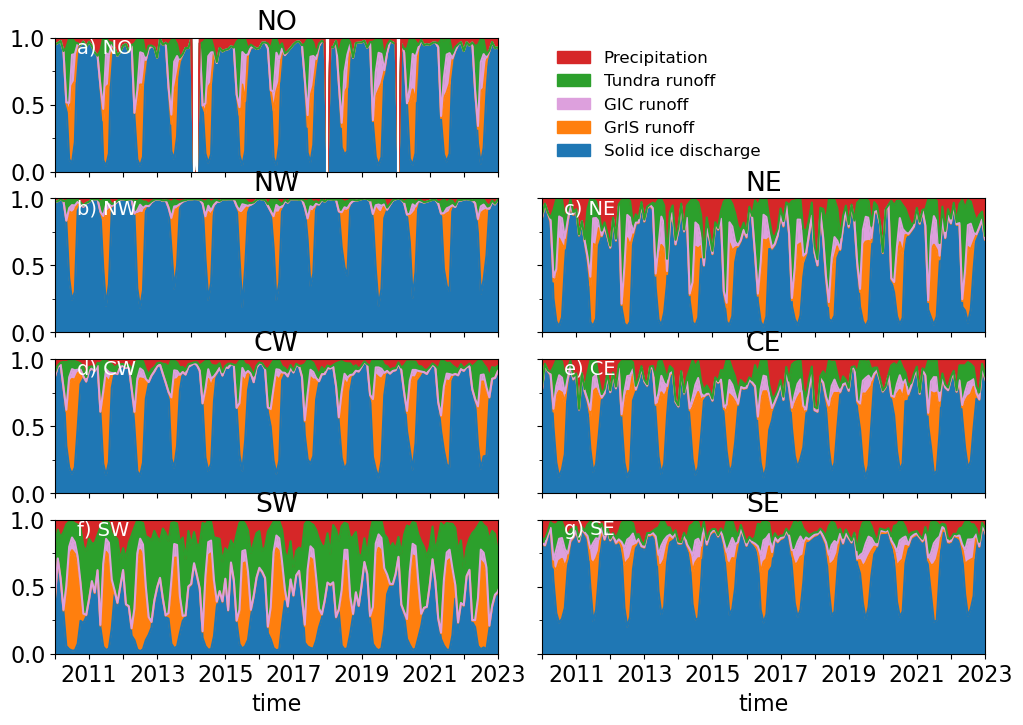

In [98]:
basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 8), sharey=True)
ylims = [0, 1]


lines, labels = [], []

# change labels of legend from Solid Ice discharge (weighted mean) to Solid Ice discharge 
dict_shorter_name = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'}

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector = dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns='Precipitation Fjords CARRA')
    # if any is nan set all to nan
    df_single_sector = df_single_sector.where(~df_single_sector.isna().any(axis=1), np.nan)
    nans = df_single_sector.isna().any(axis=1).index[df_single_sector.isna().any(axis=1)]

    # rename columns
    df_single_sector.columns = [dict_shorter_name.get(col, col) for col in df_single_sector.columns]
    df_single_sector = (df_single_sector.T/(df_single_sector.sum(axis=1).values)).T
    df_single_sector = df_single_sector[col_order_rel]
    df_single_sector.plot(kind='area', stacked=True,  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns])
    # scatter nans on y 1
    ax.vlines(nans, ylims[0], ylims[1], color='white',)

    ax.set_yticks([0, 0.5, 1])
    ax.set_yticks(np.arange(0, 1.1, 0.25), minor=True)
    ax.title.set_text(basin)
    ax.set_xticks(pd.date_range(start='2010', end='2024', freq='YS'))
    # ax.set_xtickla
    ax.text(0.05, 1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='top', transform=ax.transAxes, color ='white')


ax.set_ylim(ylims)
ax.set_xlim([pd.to_datetime("2010"), pd.to_datetime("2022") + pd.DateOffset(years=1)])

plt.subplots_adjust(wspace=0.1)
handles, labels = axs.flatten()[0].get_legend_handles_labels()
# replace labels with dict_consistent_naming
labels = [dict_consistent_naming.get(label, label) for label in labels]
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)

# 
# # save figure
# plt.savefig(pathFigures + f"Relative_freshwater_per_sector_monthly_{start}_{end}_1k.png", dpi=300, bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Mass loss (Gt)')

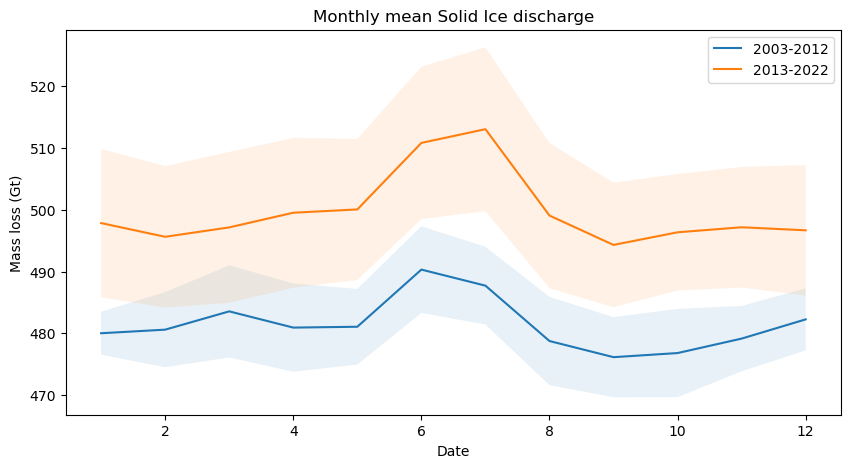

In [29]:

dfGISDMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_D.csv", index_col=0, parse_dates=True)


dfGISDMankoff2003_2012 = dfGISDMankoff['2003':'2012']
dfGISDMankoff2003_2012 = dfGISDMankoff2003_2012.groupby(dfGISDMankoff2003_2012.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISDMankoff2003_2012['std'] = dfGISDMankoff['2003':'2012'].groupby(dfGISDMankoff['2003':'2012'].index.month).std()

dfGISD_2013_2022 = dfGISDMankoff['2013':'2022']
dfGISD_2013_2022 = dfGISD_2013_2022.groupby(dfGISD_2013_2022.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISD_2013_2022['std'] = dfGISDMankoff['2013':'2022'].groupby(dfGISDMankoff['2013':'2022'].index.month).std()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

dfGISDMankoff2003_2012['mean'].plot( title='Monthly mean Solid Ice discharge', ax=ax, label = "2003-2012")
dfGISD_2013_2022['mean'].plot(ax=ax, label = "2013-2022")

ax.fill_between(dfGISDMankoff2003_2012.index, (dfGISDMankoff2003_2012['mean'] - dfGISDMankoff2003_2012['std']).to_numpy(),(dfGISDMankoff2003_2012['mean'] + dfGISDMankoff2003_2012['std']).to_numpy(), alpha=0.1)
ax.fill_between(dfGISD_2013_2022.index, (dfGISD_2013_2022['mean'] - dfGISD_2013_2022['std']).to_numpy(),(dfGISD_2013_2022['mean'] + dfGISD_2013_2022['std']).to_numpy(), alpha=0.1)
ax.legend( )
ax.set_ylabel("Mass loss (Gt)")

# data_mean_seasonal_period1['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISDMankoff2003_2012['mean'].values)
 

# Specific sector, specific year

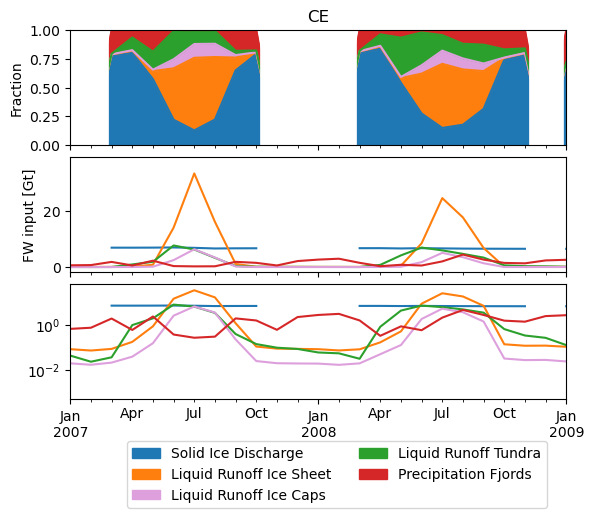

Solid Ice discharge (weighted mean)  Liquid Runoff Ice Sheet  \
time                                                                       
2007-01-01                                  NaN                     0.10   
2007-02-01                                  NaN                     0.08   
2007-03-01                                 0.78                     0.01   
2007-04-01                                 0.80                     0.02   
2007-05-01                                 0.57                     0.07   
2007-06-01                                 0.22                     0.44   
2007-07-01                                 0.13                     0.63   
2007-08-01                                 0.22                     0.54   
2007-09-01                                 0.65                     0.11   
2007-10-01                                 0.79                     0.01   
2007-11-01                                  NaN                     0.11   
2007-12-01                                  NaN                     0.04   
2008-01-01                                  NaN                     0.03   
2008-02-01                                  NaN                     0.02   
2008-03-01                                 0.80                     0.01   
2008-04-01                                 0.84                     0.02   
2008-05-01                                 0.54                     0.04   
2008-06-01                                 0.28                     0.35   
2008-07-01                                 0.15                     0.55   
2008-08-01                                 0.18                     0.48   
2008-09-01                                 0.32                     0.33   
2008-10-01                                 0.74                     0.02   
2008-11-01                                 0.78                     0.01   
2008-12-01                                  NaN                     0.04   

            Liquid Runoff Tundra  Liquid Runoff Ice Caps  Precipitation Fjords  
time                                                                            
2007-01-01                  0.05                    0.02                  0.82  
2007-02-01                  0.03                    0.02                  0.87  
2007-03-01                  0.00                    0.00                  0.21  
2007-04-01                  0.11                    0.00                  0.07  
2007-05-01                  0.16                    0.01                  0.19  
2007-06-01                  0.24                    0.08                  0.01  
2007-07-01                  0.12                    0.12                  0.00  
2007-08-01                  0.11                    0.11                  0.01  
2007-09-01                  0.04                    0.02                  0.18  
2007-10-01                  0.02                    0.00                  0.18  
2007-11-01                  0.12                    0.02                  0.75  
2007-12-01                  0.04                    0.01                  0.92  
2008-01-01                  0.02                    0.01                  0.94  
2008-02-01                  0.02                    0.01                  0.96  
2008-03-01                  0.00                    0.00                  0.18  
2008-04-01                  0.10                    0.01                  0.04  
2008-05-01                  0.34                    0.01                  0.07  
2008-06-01                  0.28                    0.07                  0.02  
2008-07-01                  0.13                    0.11                  0.05  
2008-08-01                  0.13                    0.10                  0.12  
2008-09-01                  0.16                    0.07                  0.13  
2008-10-01                  0.07                    0.00                  0.17  
2008-11-01                  0.04                    0.00                  0.16  
2008-12-01

In [257]:
 def select_basin_time(basin):
     return dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns=['Precipitation Fjords CARRA', 'adjusted_year'])


def make_plot_basin_years(basin,years):
    df_basin = select_basin_time(basin)
    fig, axs = plt.subplots(3,1,sharex=True)

    df_basin.plot(ax=axs[1], legend=False, color=[dict_colors_FW[var] for var in df_basin.columns])
    nans = df_basin.isna().any(axis=1).index[df_basin.isna().any(axis=1)]
    df_basin_rel = df_basin.where(~df_basin.isna().any(axis=1), np.nan)

    # rename columns
    df_basin_rel.columns = [dict_shorter_name.get(col, col) for col in df_basin_rel.columns]
    df_basin_rel = (df_basin_rel.T/(df_basin_rel.sum(axis=1).values)).T
    df_basin_rel = df_basin_rel[col_order_rel]
    df_basin_rel.plot(kind='area', stacked=True,  ax=axs[0],  legend=False, color=[dict_colors_FW[var] for var in df_basin_rel.columns])

    linewidth = 50/(int(years[1])- int(years[0]))
    axs[0].vlines(nans, 0, 1,color='white',linewidth=linewidth)
    axs[0].legend(ncol=2, loc='upper left', bbox_to_anchor=(0.1, -2.5))
    axs[0].set_ylim([0, 1])
    axs[0].set_ylabel("Fraction")
    axs[1].set_ylabel("FW input [Gt]")

    df_basin.plot(ax=axs[2], legend=False, color=[dict_colors_FW[var] for var in df_basin.columns])
    nans = df_basin.isna().any(axis=1).index[df_basin.isna().any(axis=1)]
    # y log
    axs[2].set_yscale('log')

    # set vspace
    axs[-1].set_xlabel("")
    plt.subplots_adjust(hspace=0.1)
    plt.xlim(years)
    axs[0].set_title(basin)
    plt.show()

yrs = ['2007', '2009']
sector = "CE"

make_plot_basin_years(sector,yrs)
select_basin_time(sector)[yrs[0]:yrs[1]].round(1).tail(24)
(select_basin_time(sector)[yrs[0]:yrs[1]].T/ select_basin_time(sector)[yrs[0]:yrs[1]].sum(axis=1)).round(2).T.head(24)

# select_basin_time("CE")[yrs[0]:yrs[1]].groupby(select_basin_time("CE")[yrs[0]:yrs[1]].index.month).mean().round(2)

In [227]:
xr.open_dataset("/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR_500m/GrIS_topo_icemask_lsm_lon_lat_0.5km.nc")

<xarray.Dataset> Size: 452MB
Dimensions:      (y: 5400, x: 2992)
Coordinates:
  * x            (x) float32 12kB -6.392e+05 -6.387e+05 ... 8.558e+05 8.563e+05
  * y            (y) float32 22kB -3.355e+06 -3.354e+06 ... -6.553e+05
Data variables:
    GIC          (y, x) float32 65MB ...
    GrIS         (y, x) float32 65MB ...
    LSM          (y, x) float32 65MB ...
    Promicemask  (y, x) float32 65MB ...
    Topography   (y, x) float32 65MB ...
    lat          (y, x) float32 65MB ...
    lon          (y, x) float32 65MB ...
Attributes:
    CDI:                        Climate Data Interface version 2.1.1 (https:/...
    Conventions:                CF-1.5
    institution:                IMAU (Brice Noel)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    netcdf:                     4.9.2 of May  1 2023 09:08:29 $
    title:                      Bare ice albedo Greenland 2000
    NCO:                        netCDF Operators version 5.1.4 (Homepage = ht...
    history_of_appended_files:  Sun Nov  5 10:08:01 2023: Appended file Expos...
    GDAL_AREA_OR_POINT:         Area
    GDAL:                       GDAL 3.7.2, released 2023/09/05
    history:                    Fri Apr 12 13:37:34 2024: ncks -v Topography,...
    CDO:                        Climate Data Operators version 2.1.1 (https:/...

In [19]:
df_Basal_Basin_monthly = pd.read_csv(pathDataTemp+ "Basal_melt/Basal_basin_monthly.csv", index_col=0)
start_year = 1980
end_year = 2023
date_range = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='MS')
repeated_cycle = np.tile(np.squeeze(df_Basal_Basin_monthly.values), (end_year - start_year + 1, 1))
df_time_series_Basal = pd.DataFrame(data=repeated_cycle, index=date_range, columns=df_Basal_Basin_monthly.columns)
ds_time_series_Basal = df_time_series_Basal.stack().to_xarray().to_dataset(name="Basal melt").rename({"level_0":"time","level_1":"Basins"})

ds_time_series_Basal

<xarray.Dataset> Size: 34kB
Dimensions:     (time: 528, Basins: 7)
Coordinates:
  * time        (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * Basins      (Basins) object 56B 'CE' 'CW' 'NE' 'NO' 'NW' 'SE' 'SW'
Data variables:
    Basal melt  (time, Basins) float64 30kB 0.1595 0.3335 ... 0.2737 0.1826

In [21]:
dsSectorSum.time.values

array(['1939-09-15T12:00:00.000000000', '1939-10-16T00:00:00.000000000',
       '1939-11-15T12:00:00.000000000', ...,
       '2023-11-15T12:00:00.000000000', '2023-12-01T00:00:00.000000000',
       '2023-12-16T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
xr.merge([dsSectorSum.drop('Basal melt'), ds_time_series_Basal])

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_24302/853527666.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  xr.merge([dsSectorSum.drop('Basal melt'), ds_time_series_Basal])


<xarray.Dataset> Size: 480kB
Dimensions:                              (time: 2068, Basins: 7)
Coordinates:
  * time                                 (time) datetime64[ns] 17kB 1939-09-1...
  * Basins                               (Basins) object 56B 'CE' 'CW' ... 'SW'
Data variables:
    Precipitation Fjords                 (time, Basins) float32 58kB nan ... nan
    Solid Ice discharge (weighted mean)  (time, Basins) float64 116kB nan ......
    Liquid Runoff Ice Sheet              (time, Basins) float32 58kB nan ... nan
    Liquid Runoff Tundra                 (time, Basins) float32 58kB 0.3402 ....
    Liquid Runoff Ice Caps               (time, Basins) float32 58kB nan ... nan
    Basal melt                           (time, Basins) float64 116kB nan ......

# Figure 3: average seasonal cycle greenland

<xarray.Dataset> Size: 34kB
Dimensions:     (time: 528, Basins: 7)
Coordinates:
  * time        (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2023-12-01
  * Basins      (Basins) object 56B 'CE' 'CW' 'NE' 'NO' 'NW' 'SE' 'SW'
Data variables:
    Basal melt  (time, Basins) float64 30kB 0.1595 0.3335 ... 0.2737 0.1826

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_25590/3347197901.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dsSectorSum.drop('Precipitation Fjords CARRA')


<xarray.Dataset> Size: 357kB
Dimensions:                              (time: 1540, Basins: 7)
Coordinates:
  * time                                 (time) datetime64[ns] 12kB 1939-09-1...
  * Basins                               (Basins) object 56B 'CE' 'CW' ... 'SW'
Data variables:
    Solid Ice discharge (weighted mean)  (time, Basins) float64 86kB nan ... nan
    Liquid Runoff Ice Sheet              (time, Basins) float32 43kB nan ... ...
    Liquid Runoff Tundra                 (time, Basins) float32 43kB 0.3402 ....
    Liquid Runoff Ice Caps               (time, Basins) float32 43kB nan ... ...
    Precipitation Fjords                 (time, Basins) float32 43kB nan ... ...
    Basal melt                           (time, Basins) float64 86kB nan ... nan

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_25590/2080835628.py:14: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  try: dsSectorSum.drop('Precipitation Fjords CARRA')
/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_25590/2080835628.py:64: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dsMonthlyGr = dsSectorSum.copy(deep=True).drop("winter_year").drop("summer_year")


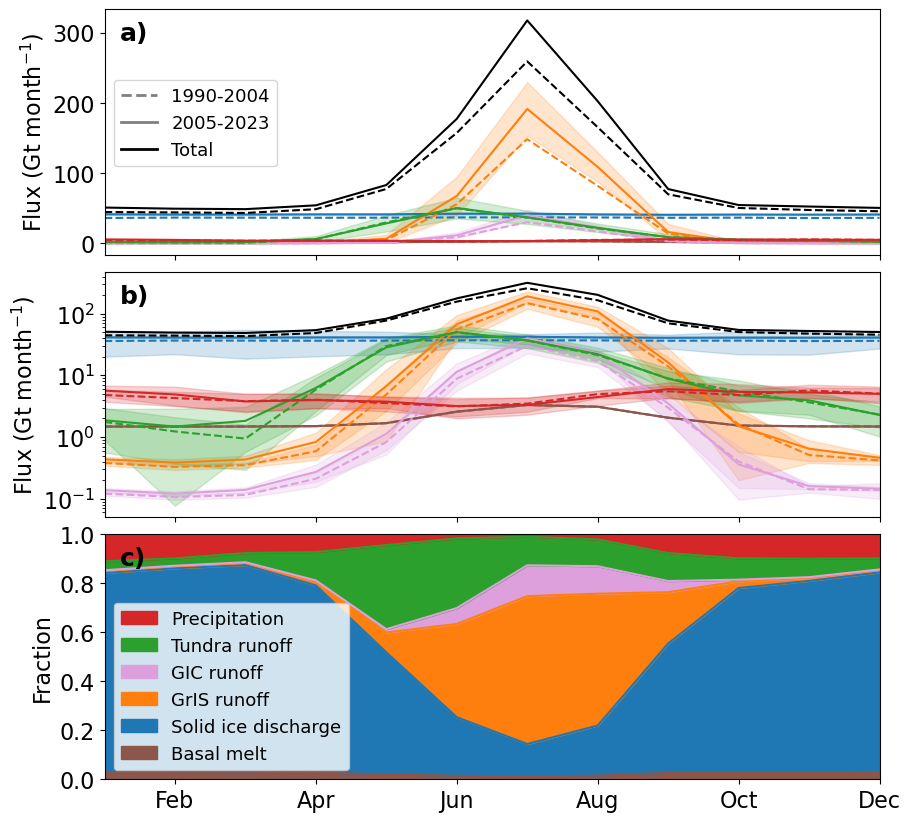

In [48]:
from matplotlib.lines import Line2D
# make a list of all the names of data variables in dsSectorSum

# fontsize
plt.rcParams.update({'font.size': 16})

# change labels of legend from Solid Ice discharge (weighted mean) to Solid Ice discharge 
dict_shorter_name = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'}



fig, axs = plt.subplots(3,1, sharex=True, figsize = (10, 10))

# ax absolute values
axs_log = axs[1]
axs_log.set_yscale('log')
ax = axs[0]

total = xr.DataArray(data = np.zeros(12), dims='month', coords={'month':np.arange(1,13)})
total_before = xr.DataArray(data = np.zeros(12), dims='month', coords={'month':np.arange(1,13)})
data_mean_seasonal_period2

for var in data_mean_seasonal_period2.data_vars:
    # a)
    data_mean_seasonal_period2[var].plot(ax=ax, label=var, color=dict_colors_FW[var])
    ax.fill_between(data_mean_seasonal_period2['month'], data_mean_seasonal_period2[var] - data_std_seasonal_period2[var], data_mean_seasonal_period2[var] + data_std_seasonal_period2[var], alpha=0.2, color=dict_colors_FW[var])
    data_mean_seasonal_period1[var].plot(ax=ax, label=var, linestyle='--', color=dict_colors_FW[var])

    # b)
    data_mean_seasonal_period2[var].plot(ax=axs_log, label=var, color=dict_colors_FW[var])
    axs_log.fill_between(data_mean_seasonal_period2['month'], data_mean_seasonal_period2[var] - data_std_seasonal_period2[var], data_mean_seasonal_period2[var] + data_std_seasonal_period2[var], alpha=0.2, color=dict_colors_FW[var])
    data_mean_seasonal_period1[var].plot(ax=axs_log, label=var, color=dict_colors_FW[var], linestyle='--')
    axs_log.fill_between(data_mean_seasonal_period2['month'], data_mean_seasonal_period1[var] - data_std_seasonal_period1[var], data_mean_seasonal_period1[var] + data_std_seasonal_period1[var], alpha=0.2, color=dict_colors_FW[var])
    
    total_before  = total_before + data_mean_seasonal_period1[var]
    total = total + data_mean_seasonal_period2[var]

handles = [Line2D([0], [0], color='grey', linewidth=2, linestyle='--'),  # Dashed line for 2003-2012
           Line2D([0], [0], color='grey', linewidth=2),  # Solid line for 2013-2022
              Line2D([0], [0], color='black', linewidth=2)]  # Total
ax.legend(handles, [f"{period1['start']}-{period1['end']}", f"{period2['start']}-{period2['end']}", "Total"], bbox_to_anchor=(0.0, 0.75), loc='upper left', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels([])

total_before.plot(ax=ax, color='black', linestyle='--')
total.plot(ax=ax, color='black')


total_before.plot(ax=axs_log, color='black', linestyle='--')
total.plot(ax=axs_log, color='black')

# do the second in percentage and stacked area
# c)
ax = axs[2]
data_mean_perc = data_mean_seasonal_period2.to_dataframe()
data_mean_perc = (data_mean_perc.T/(data_mean_perc.sum(axis=1).values)).T
data_mean_perc.plot(kind='area', stacked=True, ax=ax, color=[dict_colors_FW[var] for var in data_mean_perc.columns])
handles, labels = ax.get_legend_handles_labels()
labels = [dict_consistent_naming.get(label, label) for label in labels]
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.0, 0.0), loc='lower left', fontsize=13)
ax.set_xticks(np.arange(1, 13))
ax.set_xlim([1, 12])
ax.set_ylabel('Fraction')
ax.set_ylim([0, 1])
# set vspace
fig.subplots_adjust(hspace=0.07)
for i in range(2):
    axs[i].set_ylabel(r'Flux (Gt month$^{-1}$)')
# set xticks for feb, april, june, august, october, december
axs[-1].set_xticks([2, 4, 6, 8, 10, 12])
axs[-1].set_xticklabels(['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
axs[-1].set_xlabel('')

# add a) b) c), use bold
fontsize_letter, fontweight = 18, 'bold'
axs[0].text(0.02, 0.95, 'a)', fontsize=fontsize_letter, ha='left', va='top', transform=axs[0].transAxes, fontweight=fontweight)
axs[1].text(0.02, 0.95, 'b)', fontsize=fontsize_letter, ha='left', va='top', transform=axs[1].transAxes, fontweight=fontweight)
axs[2].text(0.02, 0.95, 'c)', fontsize=fontsize_letter, ha='left', va='top', transform=axs[2].transAxes, fontweight=fontweight)

plt.savefig(pathFigures + "Figure_3_Seasonal_variation.png", dpi=300, bbox_inches='tight')




In [97]:
# (data_mean_perc*100).round(1).to_excel(pathDataProcessed+ "Mean_seasonal_cycle_Greenland_RELATIVE_2005_2023.xlsx")
# data_mean_seasonal_period2.to_dataframe().round(2).to_excel(pathDataProcessed+ "Mean_seasonal_cycle_Greenland_ABSOLUTE_2005_2023.xlsx")
# data_std_seasonal_period2.to_dataframe().round(2).to_excel(pathDataProcessed+ "Mean_seasonal_cycle_Greenland_ABSOLUTE_std_2005_2023.xlsx")

# # format data_mean and data std as f"{mean}+-{std}"
# mean = data_mean_seasonal_period2.to_dataframe()
# std = data_std_seasonal_period2.to_dataframe()
# mean["Sum"] = mean.sum(axis=1)
# mean.loc["Mean", :] =  mean.mean(axis=0)
# std["Sum"] = std.sum(axis=1)
# std.loc["Mean", :] =  std.mean(axis=0)
# mean_std = mean.round(1).astype(str) + ' +- ' + std.round(1).astype(str)
# mean_std.to_excel(pathDataProcessed+ "Mean_seasonal_cycle_Greenland_ABSOLUTE_2005_2023_mean_std.xlsx")

In [41]:
# Select June, July, and August for every year
summer_months = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([6, 7, 8]))

# Group by year and sum over these months
summer_sum_per_year = summer_months.groupby('time.year').mean()*3

summer_sum_per_year



<xarray.Dataset> Size: 20kB
Dimensions:                              (Basins: 7, year: 84)
Coordinates:
  * Basins                               (Basins) <U2 56B 'SE' 'SW' ... 'NO'
  * year                                 (year) int64 672B 1940 1941 ... 2023
Data variables:
    Solid Ice discharge (weighted mean)  (year, Basins) float64 5kB nan ... 7...
    Liquid Runoff Ice Sheet              (year, Basins) float32 2kB nan ... 4...
    Liquid Runoff Tundra                 (year, Basins) float32 2kB 15.82 ......
    Liquid Runoff Ice Caps               (year, Basins) float32 2kB nan ... 18.6
    Precipitation Fjords                 (year, Basins) float32 2kB nan ... 0...
    Precipitation Fjords CARRA           (year, Basins) float64 5kB nan ... 0...
    adjusted_year                        (year) float64 672B 5.82e+03 ... 6.0...

In [31]:
import xarray as xr

# Function to adjust December to the next year for correct winter grouping
def adjust_winter_year(time):
    year = time.dt.year
    month = time.dt.month
    # If month is December, consider it as part of the next year
    adjusted_year = xr.where(month == 12, year + 1, year)
    return adjusted_year

# Adjust the time coordinate for winter grouping
dsSectorSum['adjusted_year'] = adjust_winter_year(dsSectorSum['time'])

# Select December, January, and February
winter_months = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([12, 1, 2]))

# Group by the adjusted year and sum over these months
winter_sum_per_year = winter_months.groupby('adjusted_year').mean()*3

# winter_sum_per_year now contains the sum of values over December, January, and February for every winter season

/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning: No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.
  warnings.warn(


In [121]:
import numpy as np
import plotly.graph_objects as go
from scipy import stats


for basin in dict_sections.values():
    fig = go.Figure()

    # df = summer_sum_per_year.sel(Basins=basin).sel(year=slice(1990, None)).to_dataframe().drop(columns=['Basins','adjusted_year'])
    df = (dsSectorSum.resample(time='YS').mean()*12).sel(Basins=basin).sel(time=slice("1990", "2022")).to_dataframe().drop(columns=['Basins','adjusted_year'])
    df.index = df.index.year

    # Add linear trend
    for col in df.columns:
        x = df.index
        y = df[col].values

        x= x[~np.isnan(y)]
        y= y[~np.isnan(y)]

        # Add the original data
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
        
        # Calculate the linear trend
        trend = np.polyfit(x, y, 1)
        trendline = np.poly1d(trend)

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        print(f'p-value for {col} trend: {p_value:.3f}')
        
        # Add the trendline
        fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f} (+-{std_err*10:.1f}) Gt/decade, {slope*10/np.mean(y)*100:.1f}%,   p={p_value:.3f}', line=dict( dash='dash', color='grey')))

    # update lyaout to plotly white
    fig.update_layout(template='plotly_white', title=f"trend in {basin}")
    fig.show()

p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.033
p-value for Liquid Runoff Tundra trend: 0.304
p-value for Liquid Runoff Ice Caps trend: 0.047
p-value for Precipitation Fjords trend: 0.194
p-value for Precipitation Fjords CARRA trend: 0.327


p-value for Solid Ice discharge (weighted mean) trend: 0.021
p-value for Liquid Runoff Ice Sheet trend: 0.024
p-value for Liquid Runoff Tundra trend: 0.836
p-value for Liquid Runoff Ice Caps trend: 0.021
p-value for Precipitation Fjords trend: 0.424
p-value for Precipitation Fjords CARRA trend: 0.627


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.023
p-value for Liquid Runoff Tundra trend: 0.002
p-value for Liquid Runoff Ice Caps trend: 0.016
p-value for Precipitation Fjords trend: 0.336
p-value for Precipitation Fjords CARRA trend: 0.339


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.026
p-value for Liquid Runoff Tundra trend: 0.187
p-value for Liquid Runoff Ice Caps trend: 0.005
p-value for Precipitation Fjords trend: 0.608
p-value for Precipitation Fjords CARRA trend: 0.543


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.007
p-value for Liquid Runoff Tundra trend: 0.043
p-value for Liquid Runoff Ice Caps trend: 0.001
p-value for Precipitation Fjords trend: 0.378
p-value for Precipitation Fjords CARRA trend: 0.218


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.001
p-value for Liquid Runoff Tundra trend: 0.002
p-value for Liquid Runoff Ice Caps trend: 0.001
p-value for Precipitation Fjords trend: 0.238
p-value for Precipitation Fjords CARRA trend: 0.161


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.001
p-value for Liquid Runoff Tundra trend: 0.619
p-value for Liquid Runoff Ice Caps trend: 0.000
p-value for Precipitation Fjords trend: 0.617
p-value for Precipitation Fjords CARRA trend: 0.894


In [102]:
df

Solid Ice discharge (weighted mean)  Liquid Runoff Ice Sheet  \
time                                                                 
1990                                  NaN                 0.002270   
1990                                  NaN                 0.002056   
1990                             1.934856                 0.001768   
1990                             1.925061                 0.002170   
1990                             1.820142                 0.008880   
...                                   ...                      ...   
2022                             2.147187                 0.002087   
2022                             2.161486                      NaN   
2022                             2.161486                 0.001991   
2022                             2.164300                      NaN   
2022                             2.164300                 0.001702   

      Liquid Runoff Tundra  Liquid Runoff Ice Caps  Precipitation Fjords  \
time                                                                       
1990          2.421099e-05                0.001297              0.151154   
1990          4.687511e-07                0.001135              0.107637   
1990                   NaN                0.000976              0.192829   
1990          2.359380e-05                0.001213              0.433091   
1990          4.283395e-01                0.008236              0.173805   
...                    ...                     ...                   ...   
2022          1.580768e-02                0.001279              0.225100   
2022                   NaN                     NaN                   NaN   
2022          4.861995e-03                0.000921              0.070659   
2022                   NaN                     NaN                   NaN   
2022          1.438902e-03                0.000860              0.182033   

      Precipitation Fjords CARRA  
time                              
1990                         NaN  
1990                         NaN  
1990                         NaN  
1990                         NaN  
1990                         NaN  
...                          ...  
2022                         NaN  
2022                    0.063936  
2022                         NaN  
2022                    0.139996  
2022                         NaN  

[780 rows x 6 columns]

In [239]:
df

Basins  Solid Ice discharge (weighted mean)  \
adjusted_year                                               
1990              NO                                  NaN   
1991              NO                             5.849195   
1992              NO                             5.659050   
1993              NO                             5.959146   
1994              NO                             5.819142   
1995              NO                             6.783903   
1996              NO                             6.284231   
1997              NO                             6.166708   
1998              NO                             5.492846   
1999              NO                             5.825772   
2000              NO                             6.309722   
2001              NO                                  NaN   
2002              NO                             5.697862   
2003              NO                             5.807534   
2004              NO                                  NaN   
2005              NO                                  NaN   
2006              NO                             6.077849   
2007              NO                             6.166685   
2008              NO                                  NaN   
2009              NO                             5.937535   
2010              NO                             6.088916   
2011              NO                             6.998567   
2012              NO                             6.134783   
2013              NO                             6.058268   
2014              NO                             6.164854   
2015              NO                             6.393871   
2016              NO                             6.279385   
2017              NO                             6.616270   
2018              NO                             6.637758   
2019              NO                             7.173469   
2020              NO                             6.689071   
2021              NO                             6.620773   
2022              NO                             6.524758   

               Liquid Runoff Ice Sheet  Liquid Runoff Tundra  \
adjusted_year                                                  
1990                          0.006489              0.000051   
1991                          0.006691              0.009704   
1992                          0.004993              0.000311   
1993                          0.003970              0.000520   
1994                          0.005496              0.003713   
1995                          0.004657                   NaN   
1996                          0.003532              0.002560   
1997                          0.003714              0.000045   
1998                          0.009330              0.000129   
1999                          0.010795              0.009825   
2000                          0.005758              0.006302   
2001                          0.006199              0.000004   
2002                          0.005488              0.032835   
2003                          0.004940              0.001040   
2004                          0.005163              0.005550   
2005                          0.003826              0.000587   
2006                          0.005367              0.000882   
2007                          0.004142              0.000002   
2008                          0.003072              0.000176   
2009                          0.002600              0.000551   
2010                          0.002469              0.002512   
2011                          0.003302              0.000760   
2012                          0.004489              0.001344   
2013                          0.004864              0.004947   
2014                          0.004644              0.000026   
2015                          0.005148              0.006467   
2016                          0.002704              0.000815   
2017                  

In [244]:
import numpy as np
import plotly.graph_objects as go
from scipy import stats


for basin in dict_sections.values():
    fig = go.Figure()

    df = summer_sum_per_year.sel(Basins=basin).sel(year=slice(1990, None)).to_dataframe().drop(columns=['Basins','adjusted_year'])

    # df = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([9])).sel(Basins=basin).sel(time=slice("1990", "2022")).to_dataframe().drop(columns=['Basins','adjusted_year'])
    # df = dsSectorSum.sel(Basins=basin).sel(time=slice("1990", "2022")).to_dataframe().drop(columns=['Basins','adjusted_year'])
    months = [9,10]
    selected_months = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([months]))
    df = (selected_months.groupby('adjusted_year').mean()*len(months)).sel(Basins=basin).sel(adjusted_year=slice(1990, 2022)).to_dataframe()#.drop(columns=['Basins','adjusted_year'])

    # df.index = df.index.year + df.index.month/12

    # Add linear trend
    for col in df.columns:
        # if col contains tundra
        if not 'Precipitation' in col:
            continue
        x = df.index
        y = df[col].values

        x= x[~np.isnan(y)]
        y= y[~np.isnan(y)]

        # Add the original data
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
        
        # Calculate the linear trend
        trend = np.polyfit(x, y, 1)
        trendline = np.poly1d(trend)

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        print(f'p-value for {col} trend: {p_value:.3f}')
        
        # Add the trendline
        fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f} (+-{std_err*10:.1f}) Gt/decade, {slope/np.mean(y)*100:.1f}%,   p={p_value:.3f}', line=dict( dash='dash', color='grey')))

    # update lyaout to plotly white
    fig.update_layout(template='plotly_white', title=f"trend in {basin}")
    fig.show()

/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.886
p-value for Precipitation Fjords CARRA trend: 0.999


p-value for Precipitation Fjords trend: 0.481
p-value for Precipitation Fjords CARRA trend: 0.618


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.022
p-value for Precipitation Fjords CARRA trend: 0.017


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.434
p-value for Precipitation Fjords CARRA trend: 0.522


p-value for Precipitation Fjords trend: 0.008
p-value for Precipitation Fjords CARRA trend: 0.009


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.355
p-value for Precipitation Fjords CARRA trend: 0.305


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.755
p-value for Precipitation Fjords CARRA trend: 0.312


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



### Seasonal cycle mean

In [100]:
print(start_year)

1980


In [101]:
dsSectorSeasonalCycle = dsSectorSum.copy(deep=True)#.drop('winter_year').drop('summer_year')
# linearly interpolate the Solid Ice discharge (weighted mean) to the same time as the other variables
dsSectorSeasonalCycle['Solid Ice Discharge'] = dsSectorSeasonalCycle['Solid Ice discharge (weighted mean)'].interp(time=dsSectorSeasonalCycle.time)

# start_year ='2013'
# end_year = '2022'  # the last year of the data (so including this year)

# # Calculate the seasonal cycle of each DataArray in the Dataset

# dsSectorSeasonalCycle2003_2012 = dsSectorSeasonalCycle.sel(time=slice("2002", "2011")).groupby('time.month').mean()

# dsSectorSeasonalCycle1990_2000 = dsSectorSeasonalCycle.sel(time=slice("1990", "2000")).groupby('time.month').mean()

SE
SW
CE
CW
NE
NW
NO


In [71]:
pathDataProcessed = pathDataTemp.split('/temp')[0] + '/processed/'
pathDataProcessed

'/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/'

In [72]:

# dsSectorSeasonalCycle.sel(time=slice('2009', '2022')).groupby('time.month').mean().sum(dim='Basins').to_dataframe().drop(columns='Solid Ice discharge (weighted mean)').to_csv(pathDataProcessed + "Seasonal_Greenland_2009_2022.csv")

Period: 2005-2023


NameError: name 'dsSectorSeasonalCycle1990_2000' is not defined

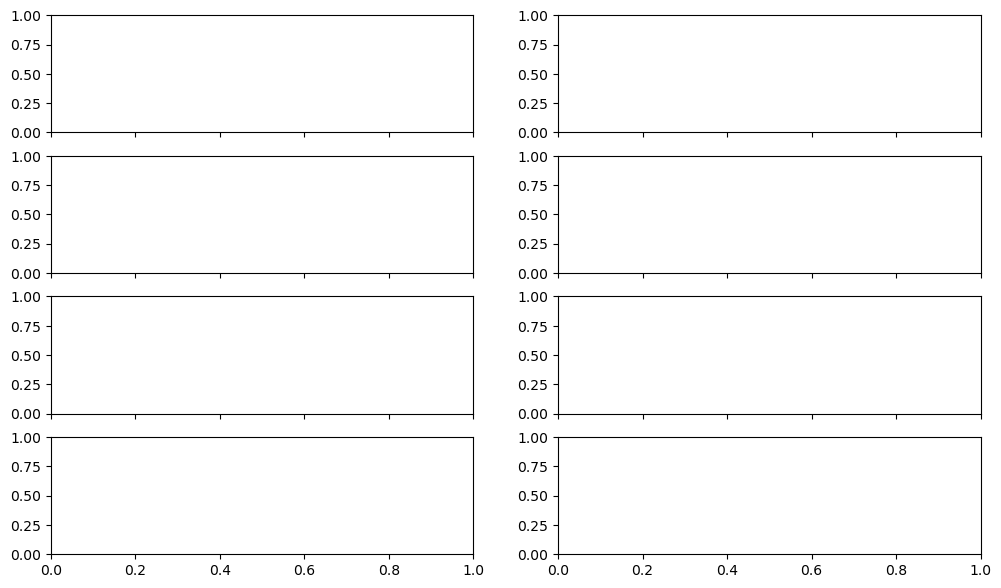

In [102]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

start_year, end_year = period2["start"], period2["end"]
print(f"Period: {start_year}-{end_year}")

for i, basin in enumerate(dict_sections.values()):
    ax = axs[:].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector2003_2012 = dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector2003_2012.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    # ax.set_xlim([1, 12])
    # ax.set_xticks(np.arange(1, 13))


    # # rightrow
    # ax_right = axs[:,1].flatten()[i]
    # df_single_sector_change = df_single_sector-df_single_sector2003_2012
    # df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])

# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
axs[::2, 0].flatten()

array([<Axes: title={'center': 'SE'}, xlabel='month'>,
       <Axes: title={'center': 'CE'}, xlabel='month'>,
       <Axes: title={'center': 'NE'}, xlabel='month'>,
       <Axes: title={'center': 'NO'}, xlabel='month'>], dtype=object)

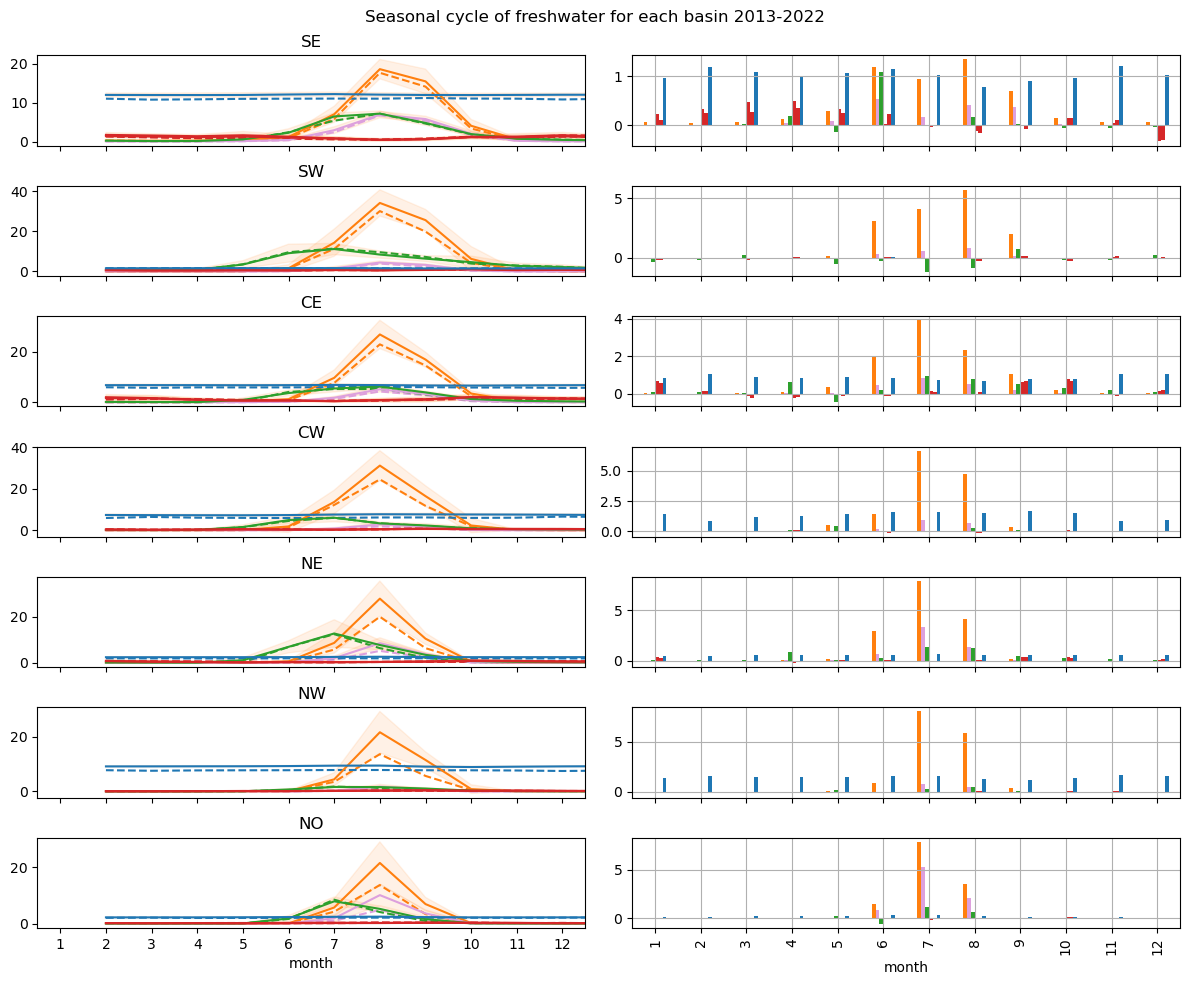

In [ ]:
fig, axs = plt.subplots(7,2, sharex=True, figsize=(12, 10))
lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dict_sections.values()):
    ax = axs[:,0].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector2003_2012 = dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector2003_2012.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    # ax.set_xlim([1, 12])
    # ax.set_xticks(np.arange(1, 13))


    # rightrow
    ax_right = axs[:,1].flatten()[i]
    df_single_sector_change = df_single_sector-df_single_sector2003_2012
    df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])
    ax_right.grid()

# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
(df_single_sector[FW_sources_racm].T/df_single_sector[FW_sources_racm].sum(axis=1)).T

Liquid Runoff Ice Sheet  Liquid Runoff Ice Caps  Liquid Runoff Tundra  \
month                                                                          
1                     0.000628                0.000396              0.000380   
2                     0.000516                0.000344              0.000436   
3                     0.000564                0.000370              0.000294   
4                     0.001210                0.000729              0.010497   
5                     0.005023                0.004365              0.415554   
6                     0.314395                0.102462              0.435956   
7                     0.545724                0.255801              0.131744   
8                     0.471290                0.244991              0.105867   
9                     0.041908                0.014481              0.037790   
10                    0.001036                0.001091              0.016283   
11                    0.000769                0.000452              0.002099   
12                    0.000685                0.000434              0.000499   

       Precipitation Fjords  Solid Ice Discharge  
month                                             
1                  0.066320             0.932275  
2                  0.044893             0.953810  
3                  0.056917             0.941855  
4                  0.047559             0.940004  
5                  0.051603             0.523456  
6                  0.015735             0.131451  
7                  0.005152             0.061579  
8                  0.022317             0.155534  
9                  0.096800             0.809021  
10                 0.092187             0.889402  
11                 0.053989             0.942691  
12                 0.060751             0.937631

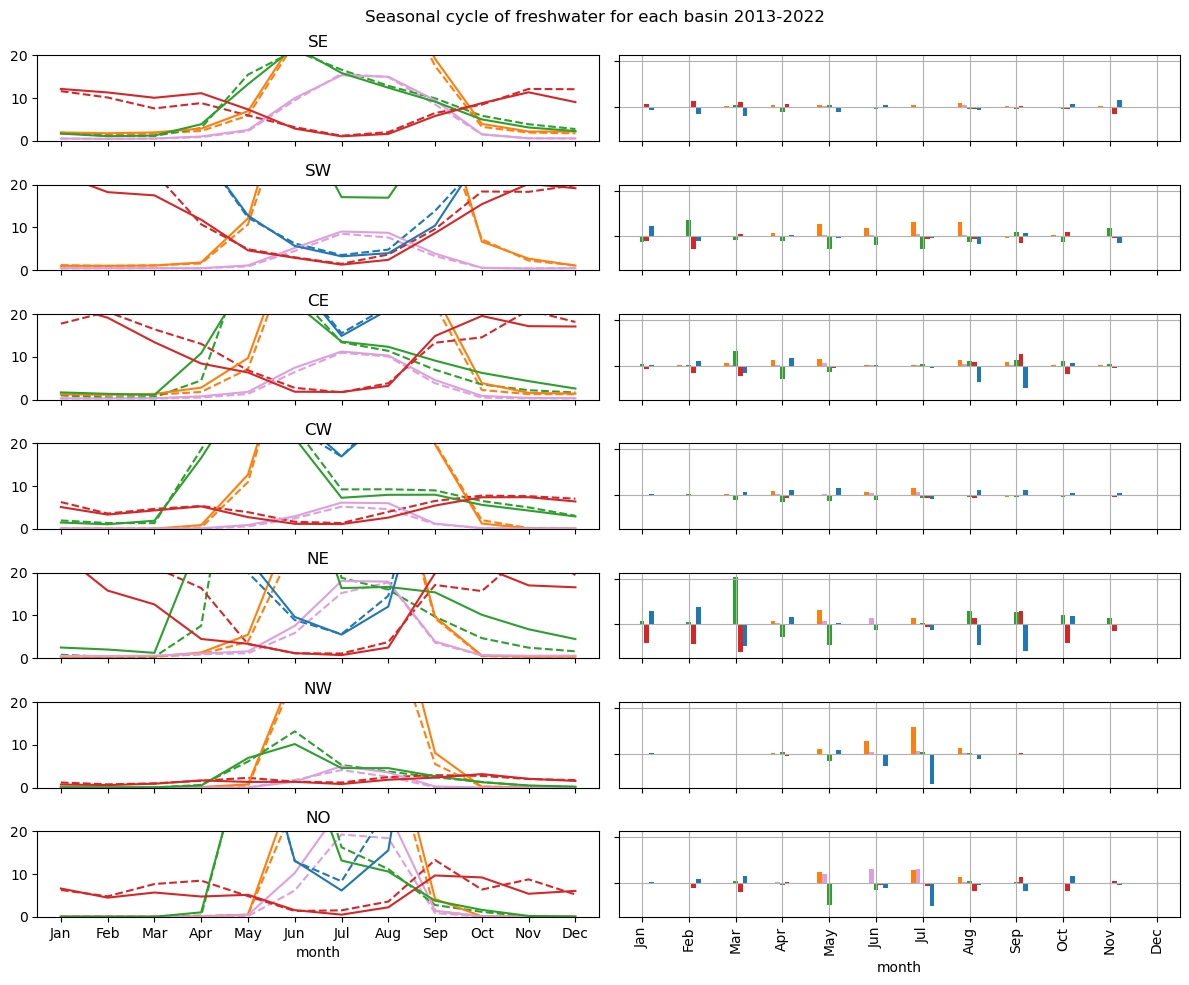

In [ ]:
fig, axs = plt.subplots(7,2, sharex=True, figsize=(12, 10), sharey='col')
lines, labels = [], []

FW_sources_racm = ['Liquid Runoff Ice Sheet', 'Liquid Runoff Ice Caps',
       'Liquid Runoff Tundra', 'Precipitation Fjords',
        'Solid Ice Discharge']
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

def percentage(df):
    return (df.T/df.sum(axis=1)).T *100

for i, basin in enumerate(dict_sections.values()):
    ax = axs[:,0].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector = percentage(df_single_sector[FW_sources_racm])   

    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector_early= dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector_early = percentage(df_single_sector_early[FW_sources_racm])
    df_single_sector_early.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    ax.title.set_text(basin)


    # rightrow
    ax_right = axs[:,1].flatten()[i]
    df_single_sector_change = df_single_sector-df_single_sector_early
    df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])
    ax_right.grid()

axs[0,-1].set_xlim([0.5, 12.5])
ax.set_ylim([0, 20])
ax.set_xticks(ticks = np.arange(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
fig.delaxes(axs.flatten()[7])

lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in data_mean_perc.columns])
    ax.title.set_text(basin)
    ax.set_xlim([1, 12])
    ax.set_xticks(np.arange(1, 13))
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")

# Relative plot per month - incl. csv

In [105]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names_id = dict(zip(np.arange(1, 13), month_names))

In [313]:
csv_seasonal_sector = f"{pathDataGithub}processed/Seasonal cycle per sector with basal/"

# Figure 5

In [123]:
dict_linestyle_FW = {'Liquid Runoff Ice Sheet': '-',
 'Liquid Runoff Ice Caps': '-',
 'Liquid Runoff Tundra': '-',
 'Precipitation Fjords': '-',
 'Solid Ice discharge (weighted mean)': '-',
 'Solid Ice Discharge': '-',
 'Precipitation Fjords CARRA': ':', 
 'Basal melt':(5, (10, 3)), 
 }

------> NO
Basal melt: 4% in Nov
Solid Ice Discharge: 91% in Nov
Liquid Runoff Ice Sheet: 55% in Jul
Liquid Runoff Ice Caps: 26% in Jul
Liquid Runoff Tundra: 43% in Jun
Precipitation Fjords: 9% in Sep
------> NW
Basal melt: 3% in Sep
Solid Ice Discharge: 97% in Feb
Liquid Runoff Ice Sheet: 61% in Jul
Liquid Runoff Ice Caps: 5% in Jul
Liquid Runoff Tundra: 10% in Jun
Precipitation Fjords: 3% in Oct
------> NE
Basal melt: 7% in Mar
Solid Ice Discharge: 80% in Mar
Liquid Runoff Ice Sheet: 60% in Jul
Liquid Runoff Ice Caps: 18% in Jul
Liquid Runoff Tundra: 66% in May
Precipitation Fjords: 24% in Jan
------> CW
Basal melt: 4% in Feb
Solid Ice Discharge: 91% in Feb
Liquid Runoff Ice Sheet: 68% in Jul
Liquid Runoff Ice Caps: 6% in Aug
Liquid Runoff Tundra: 34% in May
Precipitation Fjords: 8% in Oct
------> CE
Basal melt: 2% in Mar
Solid Ice Discharge: 82% in Mar
Liquid Runoff Ice Sheet: 58% in Jul
Liquid Runoff Ice Caps: 11% in Jul
Liquid Runoff Tundra: 29% in May
Precipitation Fjords: 21% in

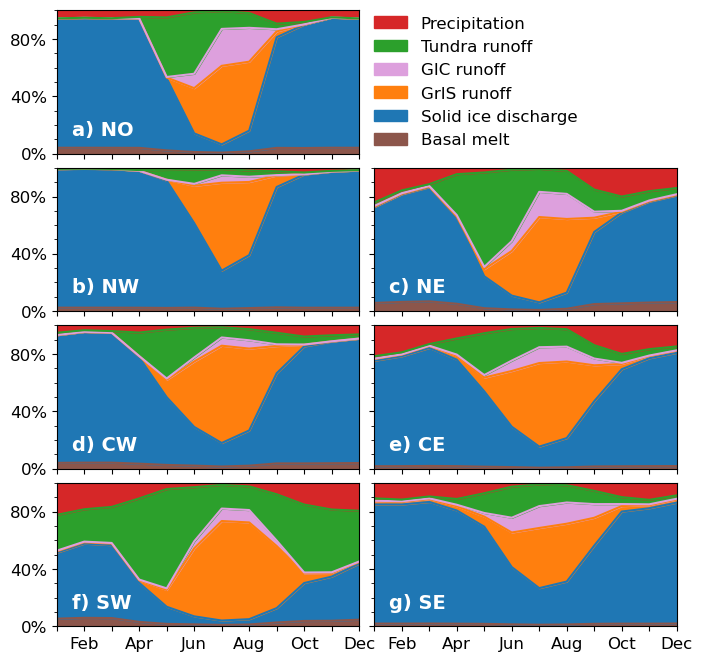

In [438]:
start_year, end_year = '2014', '2023'
 
#  col_order_rel_sector = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet','Liquid Runoff Tundra',  'Liquid Runoff Ice Caps', 'Precipitation Fjords']


pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticks = np.linspace(0,1,6, endpoint=True)
minor_yticks = np.linspace(0,1,11, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%1==0 else " " for i, ytick in enumerate(yticks)]
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=True)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')
    # add standard deviation as shading
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T
    (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/{basin}_Seasonal.csv")

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.rename(columns=dict_consistent_naming).plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # for var in df_single_sector.columns:
    #     ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color='Solid Ice discharge'[var])
    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 12+1),months, fontsize=12)
    # ax.set_xticks(np.arange(1, len(months)+1),months, fontsize=12, minor=True)

    ax.set_yticks(yticks[:-1:2], yticklabels[:-1:2], fontsize=12)
    ax.set_yticks(minor_yticks, minor=True)
    ax.set_ylim([0, 1]  )
    ax.set_xlabel('')
    ax.text(0.05, 0.1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='bottom', transform=ax.transAxes, color ='white', weight='bold')
    # fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_{basin}.png", bbox_inches='tight', transparent=True)
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1., 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.05, hspace=0.1)
# plt.tight_layout()
fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_All_{start_year}_{end_year}.png", bbox_inches='tight',  dpi=300)
plt.show()



------> SE
Basal melt: 2% in Mar
Solid Ice Discharge: 85% in Mar
Liquid Runoff Ice Sheet: 40% in Jul
Liquid Runoff Ice Caps: 15% in Jul
Liquid Runoff Tundra: 22% in Jun
Precipitation Fjords: 13% in Jan


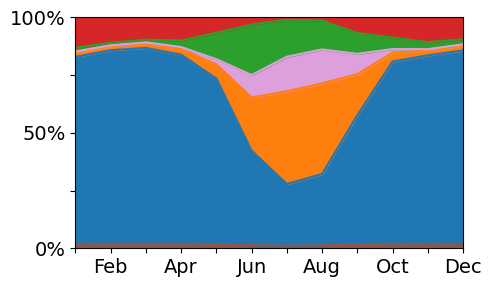

------> SW
Basal melt: 6% in Mar
Solid Ice Discharge: 51% in Mar
Liquid Runoff Ice Sheet: 68% in Jul
Liquid Runoff Ice Caps: 9% in Jul
Liquid Runoff Tundra: 67% in May
Precipitation Fjords: 20% in Nov


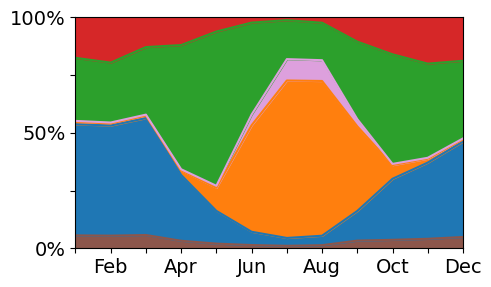

------> CE
Basal melt: 2% in Apr
Solid Ice Discharge: 81% in Mar
Liquid Runoff Ice Sheet: 58% in Jul
Liquid Runoff Ice Caps: 11% in Jul
Liquid Runoff Tundra: 27% in Jun
Precipitation Fjords: 26% in Jan


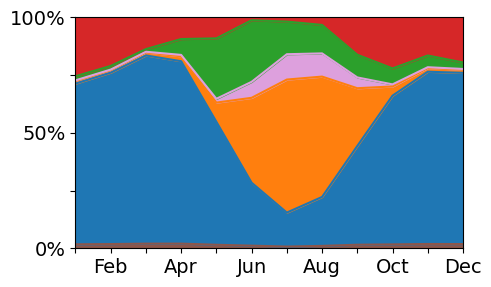

------> CW
Basal melt: 4% in Sep
Solid Ice Discharge: 91% in Feb
Liquid Runoff Ice Sheet: 67% in Jul
Liquid Runoff Ice Caps: 6% in Jul
Liquid Runoff Tundra: 33% in May
Precipitation Fjords: 7% in Nov


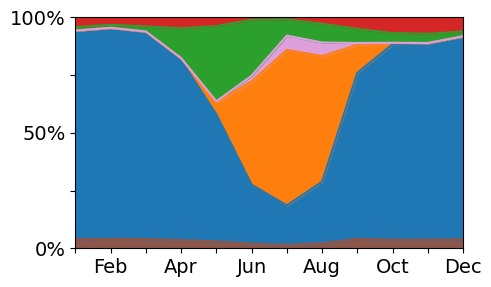

------> NE
Basal melt: 7% in Mar
Solid Ice Discharge: 79% in Mar
Liquid Runoff Ice Sheet: 58% in Jul
Liquid Runoff Ice Caps: 17% in Jul
Liquid Runoff Tundra: 62% in May
Precipitation Fjords: 26% in Oct


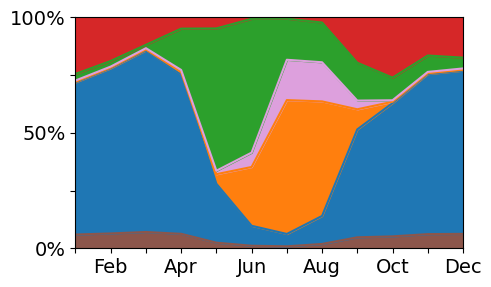

------> NW
Basal melt: 3% in Sep
Solid Ice Discharge: 97% in Jan
Liquid Runoff Ice Sheet: 61% in Jul
Liquid Runoff Ice Caps: 5% in Jul
Liquid Runoff Tundra: 11% in Jun
Precipitation Fjords: 2% in Sep


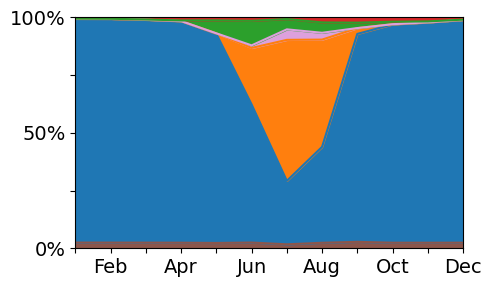

------> NO
Basal melt: 4% in Sep
Solid Ice Discharge: 91% in Feb
Liquid Runoff Ice Sheet: 54% in Jul
Liquid Runoff Ice Caps: 25% in Jul
Liquid Runoff Tundra: 50% in Jun
Precipitation Fjords: 11% in Oct


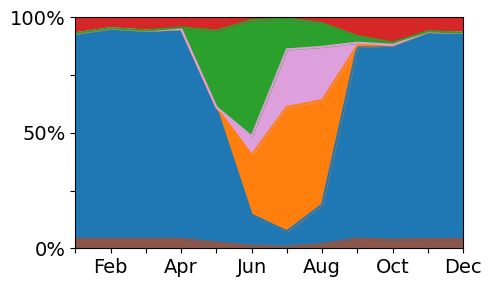

In [308]:


pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticks = np.linspace(0,1,5, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%2==0 else " " for i, ytick in enumerate(yticks)]
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')
for i, basin in enumerate(dfRunoffIceSector.columns):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    df_single_sector = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')
    # add standard deviation as shading
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T
    # (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/{basin}_Seasonal.csv")

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # for var in df_single_sector.columns:
    #     ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color='Solid Ice discharge'[var])
    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 13, ),months, fontsize=14)
    ax.set_ylim([0, 1]  )
    ax.set_yticks(yticks, yticklabels, fontsize=14)
    ax.set_xlabel('')
    # set template
    # fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_{basin}.png", bbox_inches='tight', transparent=True)
    plt.show()

## Sensitivity 
 Adding King solid ice discharge data for sensitivity

In [311]:
csv_seasonal_sector


'/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/FWclean/data/processed/Seasonal cycle per sector with basal'

------> SE
Basal melt: 2% in Mar
Solid ice discharge (King2020): 85% in Mar
Liquid Runoff Ice Sheet: 42% in Jul
Liquid Runoff Ice Caps: 15% in Jul
Liquid Runoff Tundra: 21% in Jun
Precipitation Fjords: 11% in Nov


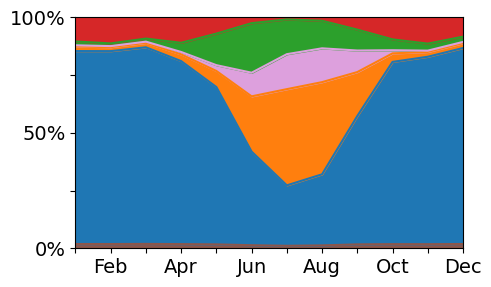

------> SW
Basal melt: 6% in Feb
Solid ice discharge (King2020): 53% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Ice Caps: 9% in Jul
Liquid Runoff Tundra: 69% in May
Precipitation Fjords: 22% in Jan


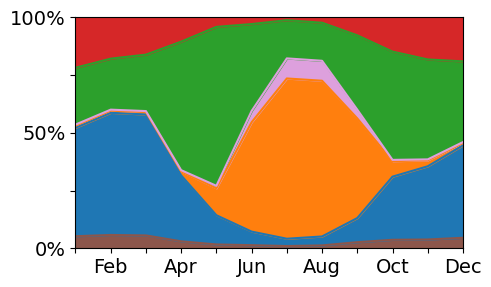

------> CE
Basal melt: 2% in Mar
Solid ice discharge (King2020): 81% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Ice Caps: 11% in Jul
Liquid Runoff Tundra: 31% in May
Precipitation Fjords: 23% in Jan


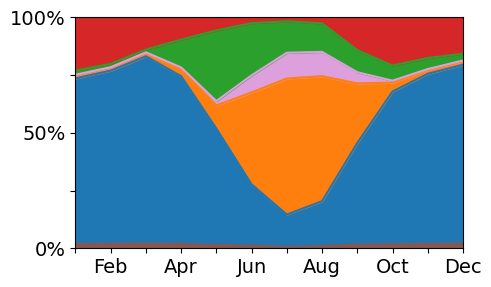

------> CW
Basal melt: 4% in Mar
Solid ice discharge (King2020): 92% in Feb
Liquid Runoff Ice Sheet: 67% in Jul
Liquid Runoff Ice Caps: 6% in Aug
Liquid Runoff Tundra: 34% in May
Precipitation Fjords: 7% in Oct


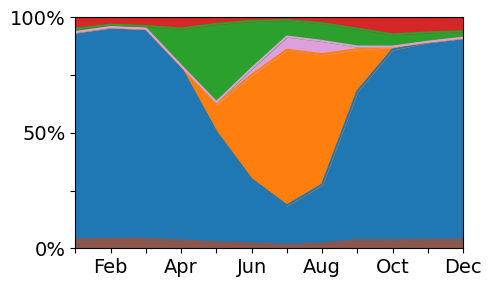

------> NE
Basal melt: 7% in Mar
Solid ice discharge (King2020): 80% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Ice Caps: 18% in Jul
Liquid Runoff Tundra: 65% in May
Precipitation Fjords: 24% in Jan


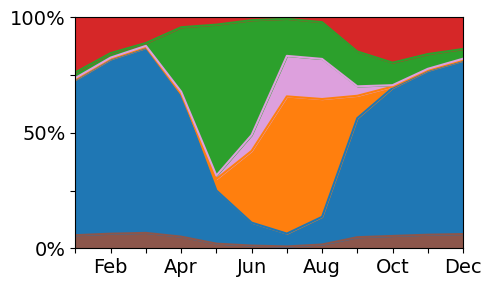

------> NW
Basal melt: 3% in Sep
Solid ice discharge (King2020): 97% in Feb
Liquid Runoff Ice Sheet: 62% in Jul
Liquid Runoff Ice Caps: 5% in Jul
Liquid Runoff Tundra: 10% in Jun
Precipitation Fjords: 3% in Oct


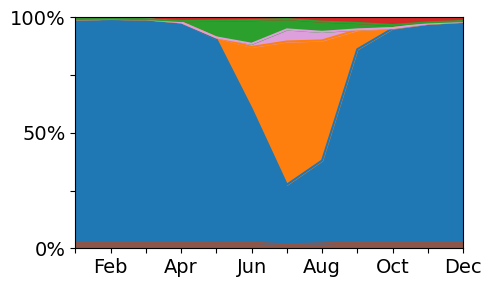

------> NO
Basal melt: 5% in Jan
Solid ice discharge (King2020): 90% in Nov
Liquid Runoff Ice Sheet: 55% in Jul
Liquid Runoff Ice Caps: 26% in Jul
Liquid Runoff Tundra: 43% in May
Precipitation Fjords: 10% in Sep


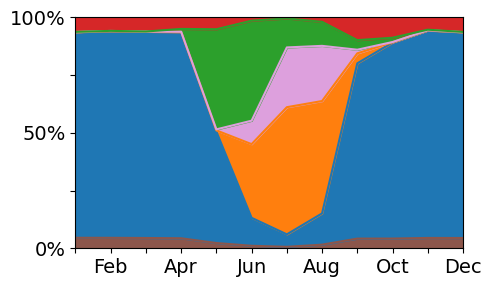

Basal melt  Solid ice discharge (King2020)  Liquid Runoff Ice Sheet  \
month                                                                        
1        0.045436                        0.889939                 0.000699   
2        0.045304                        0.894608                 0.000541   
3        0.044566                        0.892636                 0.000597   
4        0.043307                        0.892079                 0.001296   
5        0.022758                        0.482551                 0.005003   
6        0.010826                        0.121056                 0.318927   
7        0.006379                        0.053860                 0.550474   
8        0.015699                        0.135372                 0.486359   
9        0.041869                        0.758850                 0.043123   
10       0.042028                        0.848576                 0.001098   
11       0.044768                        0.897836                 0.000819   
12       0.044530                        0.890274                 0.000730   

       Liquid Runoff Ice Caps  Liquid Runoff Tundra  Precipitation Fjords  
month                                                                      
1                    0.000431              0.000308              0.063187  
2                    0.000361              0.000382              0.058804  
3                    0.000387              0.000265              0.061549  
4                    0.000802              0.012121              0.050395  
5                    0.004366              0.433512              0.051809  
6                    0.101575              0.432878              0.014738  
7                    0.258741              0.125627              0.004919  
8                    0.238834              0.103979              0.019757  
9                    0.015707              0.041533              0.098918  
10                   0.001112              0.018574              0.088612  
11                   0.000468              0.002406              0.053703  
12                   0.000458              0.000586              0.063422

In [476]:
start_year, end_year = '2014', '2023'

# Add king et al. (2020) dataset
col_order_rel_sector_KING = list((pd.Series(col_order_rel_sector)).replace({'Solid Ice Discharge': 'Solid ice discharge (King2020)'})) 
ds_D_king_per_basin = ds_D_king_per_basin_sum.rename(columns=dict_sections).stack().to_xarray().rename({'Time':'time', 'basin_nr':'Basins'}).to_dataset(name='Solid ice discharge (King2020)')['Solid ice discharge (King2020)'] /12
dsSectorSeasonalCycleKing = dsSectorSeasonalCycle.copy(deep=True).resample(time='MS').mean()
dsSectorSeasonalCycleKing['Solid ice discharge (King2020)'] = ds_D_king_per_basin.resample(time='MS').mean()
# resample at MS to align time
dsSectorSeasonalCycleKing = dsSectorSeasonalCycleKing.resample(time='MS').mean()

dict_colors_FW['Solid ice discharge (King2020)'] = dict_colors_FW['Solid Ice Discharge']

yticks = np.linspace(0,1,5, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%2==0 else " " for i, ytick in enumerate(yticks)]

for i, basin in enumerate(dfRunoffIceSector.columns):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    df_single_sector = dsSectorSeasonalCycleKing[col_order_rel_sector_KING].sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/Sensitivity_SID/{basin}_Seasonal_Sensitivity_SID.csv")


    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 13, ),months, fontsize=14)
    ax.set_ylim([0, 1]  )
    ax.set_yticks(yticks, yticklabels, fontsize=14)
    ax.set_xlabel('')
    plt.show()
df_sector_seasonal_relative

In [563]:
dsSectorSeasonalCycle.isel(time=-1)

<xarray.Dataset> Size: 400B
Dimensions:                              (Basins: 7)
Coordinates:
    time                                 datetime64[ns] 8B 2023-12-16
  * Basins                               (Basins) object 56B 'CE' 'CW' ... 'SW'
Data variables:
    Solid Ice discharge (weighted mean)  (Basins) float64 56B nan nan ... nan
    Liquid Runoff Ice Sheet              (Basins) float32 28B 0.1301 ... 0.03117
    Liquid Runoff Tundra                 (Basins) float32 28B nan nan ... nan
    Liquid Runoff Ice Caps               (Basins) float32 28B 0.02823 ... 0.0...
    Precipitation Fjords                 (Basins) float32 28B 0.8679 ... 0.7938
    Precipitation Fjords CARRA           (Basins) float64 56B nan nan ... nan
    Basal melt                           (Basins) float64 56B nan nan ... nan
    Solid Ice Discharge                  (Basins) float64 56B nan nan ... nan

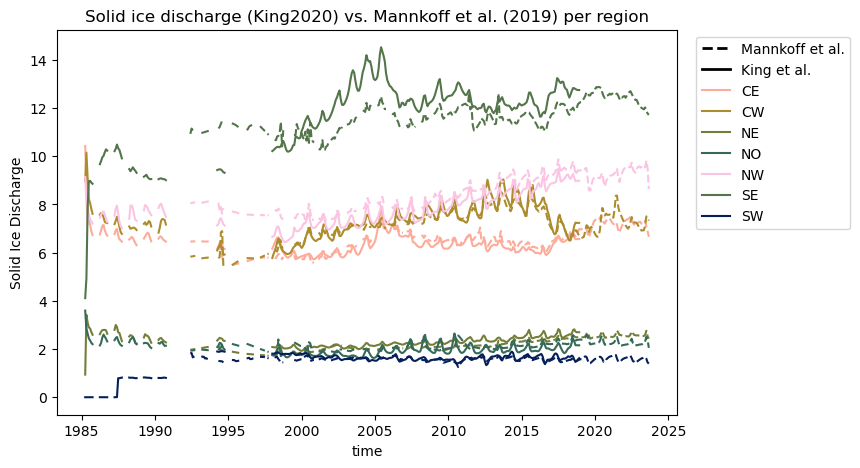

In [546]:
# Extract the regions from the dataset
regions = dsSectorSeasonalCycleKing['Basins'].values

# Map the colors to the regions
colors = [dict_regionName_colors[region] for region in regions]

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Plot the line plot with mapped colors
for region, color in zip(regions, colors):
    dsSectorSeasonalCycleKing.sel(Basins=region)['Solid ice discharge (King2020)'].plot.line(x='time', ax=ax, color=color, label=region)
    dsSectorSeasonalCycleKing.sel(Basins=region)['Solid Ice Discharge'].plot.line(x='time', ax=ax, color=color, linestyle='--')

# Add a legend
ax.legend()

# add to legend: solid line for King2020, dashed line for Mann et al. (2019)
handles, labels = ax.get_legend_handles_labels()
handles_new = [Line2D([0], [0], color='black', linewidth=2, linestyle='--'), Line2D([0], [0], color='black', linewidth=2)]
labels_new = ['Mannkoff et al.', 'King et al.']
ax.legend(handles_new + handles, labels_new + labels, bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xlim([pd.to_datetime('2009-01-01'), pd.to_datetime('2018-12-31')])
ax.set_title('Solid ice discharge (King2020) vs. Mannkoff et al. (2019) per region')
# save the figure
fig.savefig(pathFigures + 'Supplementary/Solid_ice_discharge_King2020_vs_Mannkoff2019.png', bbox_inches='tight')

------> NO
Basal melt: 5% in Jan
Solid ice discharge (King2020): 90% in Nov
Liquid Runoff Ice Sheet: 55% in Jul
Liquid Runoff Ice Caps: 26% in Jul
Liquid Runoff Tundra: 43% in May
Precipitation Fjords: 10% in Sep
------> NW
Basal melt: 3% in Sep
Solid ice discharge (King2020): 97% in Feb
Liquid Runoff Ice Sheet: 62% in Jul
Liquid Runoff Ice Caps: 5% in Jul
Liquid Runoff Tundra: 10% in Jun
Precipitation Fjords: 3% in Oct
------> NE
Basal melt: 7% in Mar
Solid ice discharge (King2020): 80% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Ice Caps: 18% in Jul
Liquid Runoff Tundra: 65% in May
Precipitation Fjords: 24% in Jan
------> CW
Basal melt: 4% in Mar
Solid ice discharge (King2020): 92% in Feb
Liquid Runoff Ice Sheet: 67% in Jul
Liquid Runoff Ice Caps: 6% in Aug
Liquid Runoff Tundra: 34% in May
Precipitation Fjords: 7% in Oct
------> CE
Basal melt: 2% in Mar
Solid ice discharge (King2020): 81% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Ice Caps: 11% in Jul
Liqui

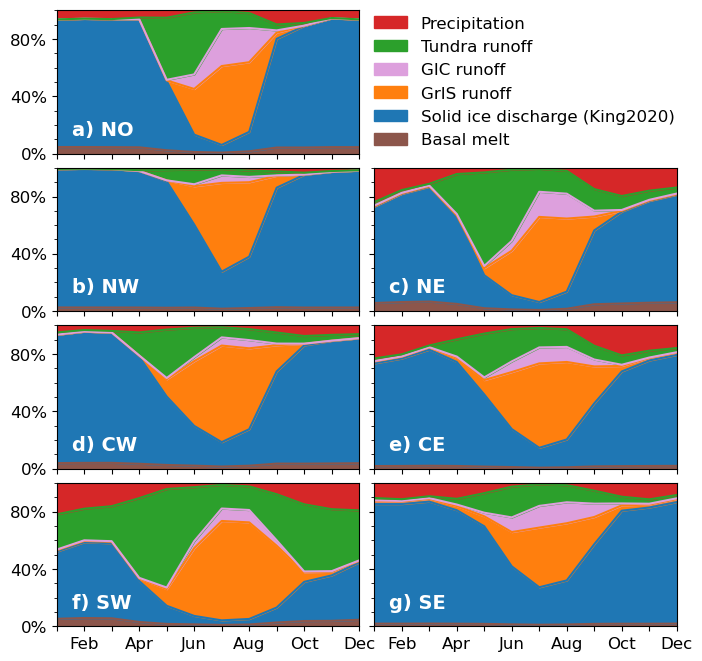

In [437]:
yticks = np.linspace(0,1,6, endpoint=True)
minor_yticks = np.linspace(0,1,11, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%1==0 else " " for i, ytick in enumerate(yticks)]
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=True)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector = dsSectorSeasonalCycleKing.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')[col_order_rel_sector_KING]
    # add standard deviation as shading
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T
    (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/Sensitivity_{basin}_Seasonal.csv")

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.rename(columns=dict_consistent_naming).plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # for var in df_single_sector.columns:
    #     ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color='Solid Ice discharge'[var])
    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 12+1),months, fontsize=12)
    # ax.set_xticks(np.arange(1, len(months)+1),months, fontsize=12, minor=True)

    ax.set_yticks(yticks[:-1:2], yticklabels[:-1:2], fontsize=12)
    ax.set_yticks(minor_yticks, minor=True)
    ax.set_ylim([0, 1]  )
    ax.set_xlabel('')
    ax.text(0.05, 0.1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='bottom', transform=ax.transAxes, color ='white', weight='bold')
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1., 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.05, hspace=0.1)
# plt.tight_layout()
fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_SENSITIVITY_SID_All_{start_year}_{end_year}.jpg", bbox_inches='tight', dpi=300)

plt.show()

In [559]:

# with king et al. (2020) data
df_seasonal_mean_perc_change = pd.read_csv(f"{csv_seasonal_sector}/Sensitivity_{basin}_Seasonal.csv", index_col=0).rename(columns={'Solid ice discharge (King2020)': 'Solid Ice Discharge'})
df_seasonal_mean_perc_change[:] = 0

for basin in dict_sections.values():
    df_seasonal_perc_king = pd.read_csv(f"{csv_seasonal_sector}/Sensitivity_{basin}_Seasonal.csv", index_col=0).rename(columns={'Solid ice discharge (King2020)': 'Solid Ice Discharge'})
    df_seasonal_perc_normal = pd.read_csv(f"{csv_seasonal_sector}/{basin}_Seasonal.csv", index_col=0)

    def make_pretty(styler):
        styler.set_caption(basin + " (%)")
        styler.background_gradient(axis=None, vmin=-2, vmax=2, cmap="coolwarm")
        # format one digit
        styler.format("{:.1f}")
        return styler

    df_seasonal_diff = df_seasonal_perc_king - df_seasonal_perc_normal
    display(df_seasonal_diff.round(1).style.pipe(make_pretty))

    # giver average change per component
    display(df_seasonal_diff.std().round(1).to_frame().T.style.pipe(make_pretty))

    df_seasonal_mean_perc_change += df_seasonal_diff

display((df_seasonal_mean_perc_change/7).style.set_caption("Average change (%)").format("{:.1f}").background_gradient(axis=None, vmin=-2, vmax=2, cmap="coolwarm"))

## total greenland
Total greenland sensitivity to solid ice discharge dataset

In [555]:
series_King20092018

Time
1     39.236724
2     39.416956
3     39.646366
4     39.934953
5     40.512915
6     41.458689
7     41.475953
8     40.520255
9     39.957885
10    39.772656
11    39.626089
12    39.534946
dtype: float64

month
1     0.021468
2     0.057662
3     0.091548
4     0.199630
5     0.372633
6     0.730056
7     0.951033
8     0.679175
9     0.616776
10    0.492512
11    0.272031
12    0.092328
Name: Solid Ice Discharge, dtype: float64

Average difference per month: 0.4  Gt
Maximum difference per month in percentage: 2.3%
Average yearly difference: 4.6 Gt
Average yearly difference in percentage: 0.9%


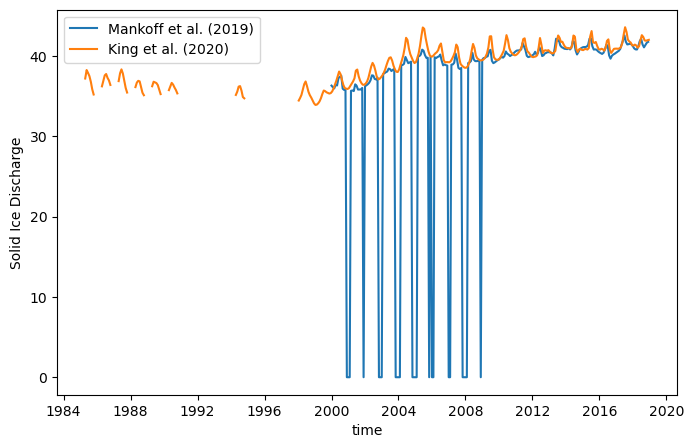

In [558]:
def make_pretty(styler, caption):
    styler.set_caption(caption)
    # format one digit
    styler.format("{:.1f}")
    return styler
def relative(df):
    return (df.T/df.sum(axis=1)).T *100
    

dsMankoff_2009_2018 = (
    dsMonthlyGr.sel(time=slice('2009', '2018'))
            .sum(dim="Basins")
    .groupby("time.month")
    .mean()
)
# Filter the series by the specified period
series_King20092018 = df_D_King_monthly_GrIS['2009':'2018']

# Group by month of the year (1-12)
series_King20092018 = series_King20092018.groupby(series_King20092018.index.month).mean() /12
dfMankoff_2009_2018 = dsMankoff_2009_2018.to_dataframe()
dfKing_2009_2018 = dfMankoff_2009_2018.copy(deep=True)
dfKing_2009_2018['Solid Ice Discharge'] = series_King20092018

display(dfMankoff_2009_2018.style.pipe(make_pretty, "Mankoff et al. (2019)"))
display(dfKing_2009_2018.style.pipe(make_pretty, "King et al. (2020)"))

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
( dsMonthlyGr.sel(time=slice('2000', '2018')).sum(dim="Basins"))['Solid Ice Discharge'].plot(ax=ax, label='Mankoff et al. (2019)')
ax.plot(df_D_King_monthly_GrIS.index, df_D_King_monthly_GrIS/12, label='King et al. (2020)')
ax.legend()

# get average difference for solid ice discharge per month and then mean, and average yearly difference
df_diff = (dfKing_2009_2018 - dfMankoff_2009_2018)['Solid Ice Discharge']
display(df_diff)
print(f"Average difference per month: {df_diff.mean():.1f}  Gt")
print(f"Maximum difference per month in percentage: {(df_diff/dfMankoff_2009_2018['Solid Ice Discharge']).max():0.1%}")
print(f"Average yearly difference: {dfKing_2009_2018['Solid Ice Discharge'].sum() - dfMankoff_2009_2018['Solid Ice Discharge'].sum():.1f} Gt")
print(f"Average yearly difference in percentage: {(dfKing_2009_2018['Solid Ice Discharge'].sum() - dfMankoff_2009_2018['Solid Ice Discharge'].sum())/dfMankoff_2009_2018['Solid Ice Discharge'].sum():.1%}")

display((relative(dfKing_2009_2018)-relative(dfMankoff_2009_2018)).style.pipe(make_pretty, "King et al. (2020) - Mankoff et al. (2019)"))
display(relative(dfKing_2009_2018).style.pipe(make_pretty, "King et al. (2020) (%)"))
display(relative(dfMankoff_2009_2018).style.pipe(make_pretty, "Mankoff et al. (2019) (%)"))

# data_mean_seasonal_period2

In [257]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'tab10' colormap
cmap = plt.get_cmap('tab10')

# Get the RGB values of the colors in the colormap
rgb_values = [mcolors.to_rgb(cmap(i)) for i in range(cmap.N)]

# Create the dictionary
dict_colors_FW_rgb = {
    'Liquid Runoff Ice Sheet': rgb_values[1],
    'Liquid Runoff Ice Caps': rgb_values[4],
    'Liquid Runoff Tundra': rgb_values[2],
    'Precipitation Fjords': rgb_values[3],
    'Solid Ice discharge (weighted mean)': rgb_values[0],
    'Solid Ice Discharge': rgb_values[0],
    'Solid Ice discharge': rgb_values[0]

}


In [245]:
df_sector_all = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().to_dataframe()
df_sector_seasonal_relative = (df_sector_all.T/df_sector_all.sum(axis=1)).T
df_sector_seasonal_relative_per_sector = df_sector_seasonal_relative.stack().reset_index().rename(columns={'level_2':'Source', 0:'%'})
df_sector_seasonal_relative_per_sector["%"] = (df_sector_seasonal_relative_per_sector["%"] * 100).round(1)

In [261]:
dict_colors_FW = dict(zip(data_varsFW, colors_FW))
dict_colors_FW['Solid Ice Discharge'] = 'tab:blue'

In [350]:
import plotly.graph_objects as go
import plotly.io as pio




# replace Solid_iCE discharge with Solid Ice discharge (weighted mean)
# df_sector_windrose['Source'] = df_sector_windrose['Source'].replace('Solid Ice discharge (weighted mean)', 'Solid Ice Discharge')
for basin in ['NO', 'NE', 'CE', 'SE', 'SW', 'CW', 'NW']:
    fig = go.Figure()

    df_sector_windrose = df_sector_seasonal_relative_per_sector[df_sector_seasonal_relative_per_sector['Basins'] == basin]
    for source in df_sector_windrose['Source'].unique():
        df_source = df_sector_windrose[df_sector_windrose['Source'] == source]
        fig.add_trace(go.Barpolar(
            r=df_source['%'].values,
            name=f"{basin} {source}",
            marker_color=f'rgb{dict_colors_FW_rgb[source]}',
        ))

    fig.update_traces(text=month_names)
    # fig.update_traces(text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'])
    fig.update_layout(
        font_size=16,
        polar_radialaxis_ticksuffix='%',
        polar_radialaxis_tickvals=[0, 20, 40, 60, 80, 100],
        polar_radialaxis_ticktext=['', '', '', '', '', ''],
        showlegend=False, 
        legend_font_size=16,
        polar_angularaxis_direction='clockwise',
        polar_angularaxis_rotation=90,
        template="plotly_white",
        polar_angularaxis_tickvals=np.arange(0,360,30),
        polar_angularaxis_ticktext=month_names,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)', 
        width =400,
        height =400)
    # fig.write_image(pathFigures + f"Windrose_{basin}.png", width=800, height=800, scale=2)

    fig.show()

In [351]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'tab10' colormap
cmap = plt.get_cmap('tab10')

# Get the RGB values of the colors in the colormap
rgb_values = [mcolors.to_rgb(cmap(i)) for i in range(cmap.N)]

# Print the RGB values
for i, rgb in enumerate(rgb_values):
    print(f"Color {i}: {rgb}")

Color 0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
Color 1: (1.0, 0.4980392156862745, 0.054901960784313725)
Color 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
Color 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
Color 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
Color 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
Color 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
Color 7: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
Color 8: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
Color 9: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)


### Per sector timeseries

In [363]:
dsSectorTimeseriesYY[var].sel(Basins=basin)

<xarray.DataArray 'Precipitation Fjords CARRA' (time: 85)> Size: 680B
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       1.75880335, 1.25067656, 2.01071043, 1.7400006 , 2.13948538,
       1.61264421, 1.68402171, 1.70650616, 1.40400188, 1.69336501,
       1.58992523, 1.6915425 , 1.4649318 , 1.9728678 , 1.68495645])
Coordinates:
    Basins   <U2 8B 'NO'
  * time     (time) datetime64[ns] 680B 1939-01-01 1940-01-01 ... 2023-01-01

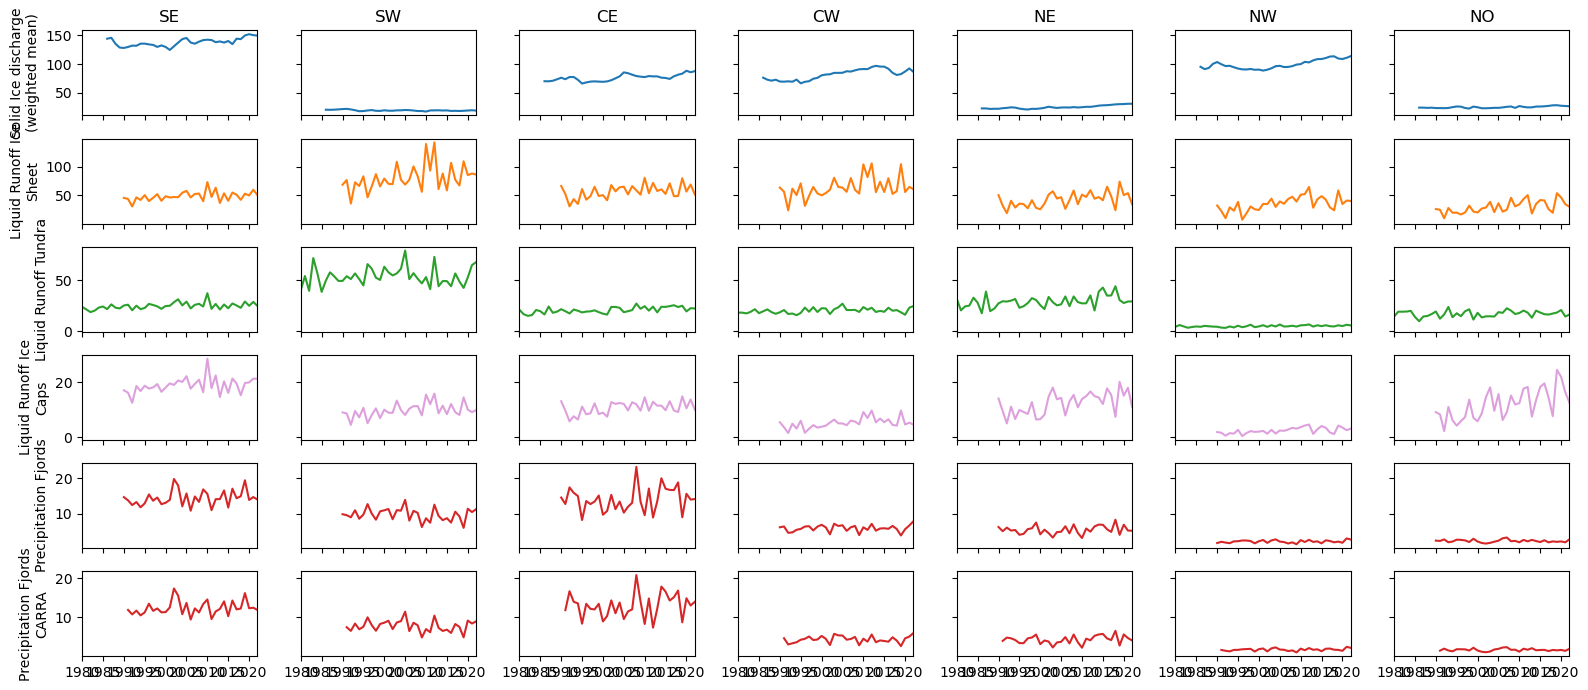

In [527]:
import textwrap

# if sector sum not in locals, read 
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")


# dsSectorTimeseriesYY = (dsSectorSum.resample(time='YS').mean()*12).sel(time=slice('1980', '2022'))

# fig, axs = plt.subplots(6, 7, figsize=(16, 7), sharex=True, sharey='row')

# for j, basin in enumerate(dfRunoffIceSector.columns):
#     axs[0,j].set_title(basin)
#     for i, var in enumerate(dsSectorTimeseries.data_vars):
#         axs[i, j].plot(pd.to_datetime(dsSectorTimeseriesYY.time),dsSectorTimeseriesYY[var].sel(Basins=basin).values, label=f"{var}\n{basin}", color=dict_colors_FW[var])
#         wrapped_label = textwrap.fill(var, 20)  # Wrap text after 10 characters
#         axs[i, 0].set_ylabel(wrapped_label)
#     # format xticks conciseformatter
#     axs[-1, j].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
#     axs[-1, j].set_xlim([pd.to_datetime("1980"), pd.to_datetime("2022")])

# plt.tight_layout()



In [630]:
# Convert the colors to RGB format and store them in the new dictionary
dict_colors_FW_rgb = {}
for source, color in dict_colors_FW.items():
    rgb = mcolors.to_rgb(color)
    dict_colors_FW_rgb[source] = rgb
# Convert the RGB values to CSS color format and store them in a new dictionary
dict_colors_FW_css = {}
for source, rgb in dict_colors_FW_rgb.items():
    css_color = mcolors.rgb2hex(rgb)
    dict_colors_FW_css[source] = css_color

print(dict_colors_FW_rgb)

{'Liquid Runoff Ice Sheet': (1.0, 0.4980392156862745, 0.054901960784313725), 'Liquid Runoff Ice Caps': (0.8666666666666667, 0.6274509803921569, 0.8666666666666667), 'Liquid Runoff Tundra': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'Precipitation Fjords': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'Solid Ice discharge (weighted mean)': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Solid Ice Discharge': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Precipitation Fjords CARRA': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}


['rgba(31, 119, 180, 1)',
 'rgba(255, 127, 14, 1)',
 'rgba(44, 160, 44, 1)',
 'rgba(221, 160, 221, 1)',
 'rgba(214, 39, 40, 1)',
 'rgba(214, 39, 40, 1)']

In [614]:
# import pandas as pd
# import xarray as xr
# import plotly.express as px

# # Check if dsSectorSum is in locals, if not read it
# if 'dsSectorSum' not in locals():
#     dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

# col_order_yearly= ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet', 'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps', 'Precipitation Fjords', 'Precipitation Fjords CARRA']
# colors = ['blue', 'orange', 'green', 'purple', 'red', 'red']
# # Include VFIRS variable in the dataset processing
# dfSectorTimeseriesYY = (
#     dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_abs]
#     .resample(time='YS').mean() * 12
# ).sel(time=slice('1980', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2': 'Source', 0: 'Gt'})
# # Include VFIRS variable in the dataset processing

# # colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_abs]]


# pd.options.plotting.backend = "plotly"

# # Colors for the plot
# colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_yearly]]

# # Plotly figure
# fig = px.line(dfSectorTimeseriesYY, x='time', y='Gt', color='Source', facet_col='Basins', facet_col_wrap=2,
#               facet_col_spacing=0.05, facet_row_spacing=0.03, title="Freshwater flux per source per basin",
#               template='plotly_white',
#              category_orders={'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE',  'NO'][::-1]}
#              )

# for trace in fig.data:
#     if trace.name == 'Precipitation Fjords CARRA':
#         trace.line = dict(dash='dash', width=2, color='red')
# # Update layout
# fig.update_layout(
#     autosize=False, 
#     width=800, 
#     height=800, 
#     template='plotly_white',
#     legend=dict(
#         x=0.6,
#         y=0.02,
#         traceorder="normal",
#     )
# )
# # Update titles for each subplot

# alphabet = "gefcdab"
# for i, annotation in enumerate(fig['layout']['annotations']):
#     annotation.update(
#     text=f"{alphabet[i]} {annotation['text'].split('=')[1].strip()} ",
#     )


# fig.update_yaxes(matches=None, showticklabels=True)

# # fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin.png",)

# fig.show()




In [191]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', size='pop',
                facet_col='year', facet_col_wrap=4)

fig.layout.yaxis.matches = 'y'
fig.layout.yaxis2.matches = 'y'
fig.layout.yaxis3.matches = 'y'
fig.layout.yaxis4.matches = 'y'

fig.layout.yaxis5.matches = 'y5'
fig.layout.yaxis7.matches = 'y5'
fig.layout.yaxis6.matches = 'y5'
fig.layout.yaxis8.matches = 'y5'

fig.layout.yaxis9.matches = 'y9'
fig.layout.yaxis10.matches = 'y9'
fig.layout.yaxis11.matches = 'y9'
fig.layout.yaxis12.matches = 'y9'

fig.show()

In [209]:
(dsSectorSum.resample(time='YS').mean()*12).sum(dim='Basins').to_dataframe().plot()

In [23]:
# dsSectorSum 
# add empty datavar


<xarray.Dataset> Size: 484kB
Dimensions:                              (time: 1408, Basins: 7)
Coordinates:
  * time                                 (time) datetime64[ns] 11kB 1939-09-1...
  * Basins                               (Basins) <U2 56B 'SE' 'SW' ... 'NO'
Data variables:
    Liquid Runoff Ice Sheet              (time, Basins) float32 39kB ...
    Liquid Runoff Ice Caps               (time, Basins) float32 39kB ...
    Liquid Runoff Tundra                 (time, Basins) float32 39kB ...
    Precipitation Fjords                 (time, Basins) float32 39kB ...
    Precipitation Fjords CARRA           (time, Basins) float64 79kB ...
    Solid Ice discharge (weighted mean)  (time, Basins) float64 79kB nan ... nan
    empty                                (time, Basins) float64 79kB nan ... nan
                                         (time, Basins) float64 79kB nan ... nan

In [3]:
import pandas as pd
import xarray as xr
import plotly.express as px

from scripts.open_preprocess_racmo import *
from scripts.paths import *
from scripts.dicts import *

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

# Define the columns and colors
col_order_yearly = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet', 'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps', 'Precipitation Fjords', 'Precipitation Fjords CARRA']
colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), 1) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_yearly]]


# Include VFIRS variable in the dataset processing
dfSectorTimeseriesYY = (
    dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly]
    .resample(time='YS').mean() * 12
).sel(time=slice('1990', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2': 'Source', 0: 'Gt'})

# Set plotting backend to Plotly
pd.options.plotting.backend = "plotly"

# add empty column in dfSectorTimeseriesYY
dfSectorTimeseriesYY['Basins'] = ' '

# Plotly figure with facet grid
fig = px.line(dfSectorTimeseriesYY, x='time', y='Gt', color='Source', facet_col='Basins',
              facet_col_spacing=0.05, facet_row_spacing=0.03, title="Freshwater flux per source per basin",
              facet_col_wrap=2, 
              template='plotly_white', color_discrete_sequence=colors,
              category_orders={'Source': col_order_yearly, 'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE',  'NO'][::-1]}
             )

# Update traces with custom styling
for trace in fig.data:
    if trace.name == 'Precipitation Fjords CARRA':
        trace.line = dict(dash='dash', width=2, color='rgba(214, 39, 40, 1)')
    # if trace.name == 'Solid Ice Discharge':
    #     trace.line = dict(width=2, color='blue')

# Update layout
fig.update_layout(
    autosize=False,
    width=800, 
    height=800, 
    template='plotly_white',
    legend=dict(
        x=0.6,
        y=0.02,
        traceorder="normal"
    )
)
# fig.layout.yaxis.matches = 'y'
# fig.layout.yaxis2.matches = 'y'
# fig.layout.yaxis3.matches = 'y3'
# fig.layout.yaxis4.matches = 'y3'
# fig.layout.yaxis5.matches = 'y5'
# fig.layout.yaxis6.matches = 'y5'


alphabet = "gefcdab"



# # # Update annotations with alphabet labels 
# for i, annotation in enumerate(fig['layout']['annotations']):
#     annotation.update(
#         text=f"{alphabet[i]}) {annotation['text'].split('=')[1].strip()} ",
#     )

fig.update_yaxes(showticklabels=True, matches=None, rangemode="tozero")
# fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin.png")
fig.show()


Basins       time               Source          Gt
0           1990-01-01  Solid Ice Discharge  128.256393
5           1991-01-01  Solid Ice Discharge  129.934361
11          1992-01-01  Solid Ice Discharge  132.338225
17          1993-01-01  Solid Ice Discharge  132.069670
23          1994-01-01  Solid Ice Discharge  135.721360
...     ...        ...                  ...         ...
1349        2018-01-01  Solid Ice Discharge   28.171755
1355        2019-01-01  Solid Ice Discharge   28.378818
1361        2020-01-01  Solid Ice Discharge   27.434186
1367        2021-01-01  Solid Ice Discharge   27.024957
1373        2022-01-01  Solid Ice Discharge   26.602930

[231 rows x 4 columns]

In [33]:
#  copy dict_colors_FW into dict_linestyle_FW and make all lines solid, except for if it contains "CARRA", than dotted
dict_linestyle_FW = {'Liquid Runoff Ice Sheet': '-',
 'Liquid Runoff Ice Caps': '-',
 'Liquid Runoff Tundra': '-',
 'Precipitation Fjords': '-',
 'Solid Ice discharge (weighted mean)': '-',
 'Solid Ice Discharge': '-',
 'Precipitation Fjords CARRA': ':'}


------> NO
------> NW
------> NE
------> CW
------> CE
------> SW
------> SE


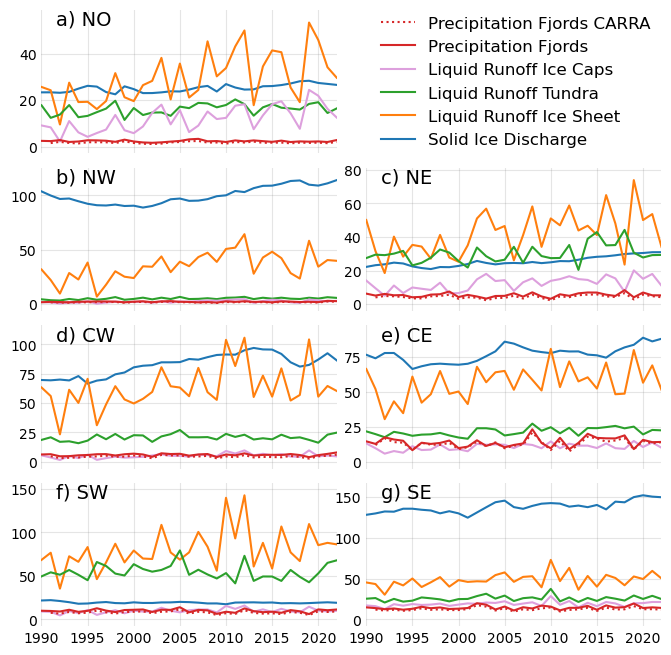

In [50]:

pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=False)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector =(dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly].resample(time='YS').mean() * 12).sel(time=slice('1990', '2022')).sel(Basins=basin).to_dataframe().drop(columns='Basins')      

    print("------> " + basin)
    for var in df_single_sector.columns:
        linestyle = dict_linestyle_FW[var]
        df_single_sector[var].plot(kind='line', ax=ax, legend=False, color=dict_colors_FW[var], linestyle=linestyle)

    ax.grid(color = 'gray',alpha = 0.2)
    ymax = df_single_sector.max().max()*1.1
    ax.set_ylim([-ymax/20, ymax])  
    for side in  ['top', 'bottom', 'left', 'right']:
        ax.spines[side].set_visible(False)
    ax.set_xlabel('')
    # remove minor ticks
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=False)
    # set minor ticks 
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=True)
    ax.tick_params( length=0)  # Adjust major tick length as needed

    ax.text(0.05, 1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='top', transform=ax.transAxes, color ='black')
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()
plt.show()

In [656]:
import plotly.express as px
# if sector sum not in locals, read 
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

alpha = 1 # Adjust this value to change the transparency. 0 is fully transparent, 1 is fully opaque.
colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_abs]]

dfSectorTimeserieMM = (dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_abs].resample(time='MS').mean()*12).sel(time=slice('2012', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2':'Source', 0:'Gt'})
fig = px.area(dfSectorTimeserieMM, x='time', y='Gt', color='Source', line_group='Basins', facet_col='Basins', facet_col_wrap=1, facet_col_spacing=0.04, facet_row_spacing=0.02,  color_discrete_sequence=colors,               category_orders={'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE', 'NO'][::-1]})


fig.update_layout(
    autosize=False, 
    width=800, 
    height=800, 
    template='plotly_white',
    legend=dict(
        x=1,
        y=1,
        traceorder="reversed")
)

alphabet = "abcdefg"
alphabet = "gfedcba"
for i, annotation in enumerate(fig['layout']['annotations']):
    annotation.update(
    text=f"{alphabet[i]}) {annotation['text'].split('=')[1].strip()} ",
    )
fig.update_yaxes(matches=None, showticklabels=True)
fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin_monthly.png")
fig.show()


In [ ]:
dfSectorTimeserieMM.plot()

# Seasonal change

In [289]:
data_varsFW = list(dsSectorSum.data_vars)
data_varsFW

['Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Precipitation Fjords CARRA',
 'Solid Ice discharge (weighted mean)',
 'winter_year',
 'summer_year']

In [265]:
basinorderkarlsson = ["SW", "SE", "NW", "NO", "NE", "CW", "CE"][::-1]

In [282]:
dsSectorSum['winter_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month <= 3) | (dsSectorSum.time.dt.month >= 10), np.nan)
dsSectorSum['winter_year'] = dsSectorSum['winter_year'].where(dsSectorSum.time.dt.month <= 3, dsSectorSum['winter_year'] + 1)
ds_winter_sum = dsSectorSum.groupby('winter_year').mean(skipna=True)
# multiply data_varsFW by 6
ds_winter_sum[data_varsFW] = ds_winter_sum[data_varsFW] * 6
df_winter_sum = ds_winter_sum.to_dataframe()
df_winter_sum["Winter Liquid"] = df_winter_sum["Liquid Runoff Ice Sheet"] + df_winter_sum["Liquid Runoff Ice Caps"] + df_winter_sum["Liquid Runoff Tundra"] + df_winter_sum["Precipitation Fjords"]
df_winter_sum["Winter Solid"] = df_winter_sum["Solid Ice discharge (weighted mean)"]

# Create a new coordinate 'year' for the summer year of each time point
dsSectorSum['summer_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month >= 4) & (dsSectorSum.time.dt.month <= 9), np.nan)
ds_summer_sum = dsSectorSum.groupby('summer_year').mean(skipna=True)
ds_summer_sum[data_varsFW] = ds_summer_sum[data_varsFW] * 6.

ds_summer_sum["Summer Liquid"] = ds_summer_sum["Liquid Runoff Ice Sheet"] + ds_summer_sum["Liquid Runoff Ice Caps"] + ds_summer_sum["Liquid Runoff Tundra"] + ds_summer_sum["Precipitation Fjords"]
ds_summer_sum["Summer Solid"] = ds_summer_sum["Solid Ice discharge (weighted mean)"]
df_summer_sum =ds_summer_sum.to_dataframe()

dfSectorSeasonalSum = pd.concat([df_summer_sum["Summer Liquid"], df_summer_sum["Summer Solid"], df_winter_sum["Winter Liquid"], df_winter_sum["Winter Solid"]], axis=1)
dfSectorSeasonalSum.index.set_names(['Year', 'Basin'], inplace=True)
dfSectorSeasonalSum = dfSectorSeasonalSum.dropna()

In [284]:

dfSectorSeasonalSumdiff = ((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna()
# .to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange.csv")

Text(0.5, 0.98, 'Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)')

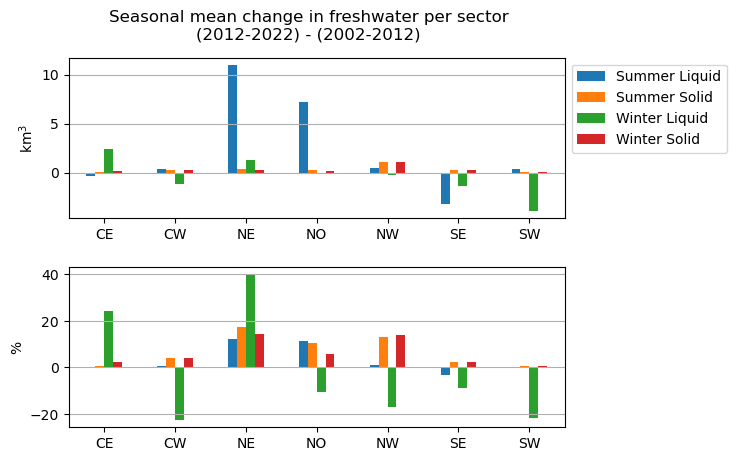

In [285]:
fig, (axKM, axPercent) = plt.subplots(2,1)

((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna().loc[basinorderkarlsson].plot(kind='bar', ax=axPercent,  legend=False, ylabel="%")
# horizontal grid

# drop not gris
(dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()).loc[basinorderkarlsson].plot(kind='bar', ax=axKM, ylabel=r"km$^3$",    legend=False)

axKM.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.subplots_adjust(hspace=0.3)
for ax in [axKM, axPercent]:
    ax.grid(axis='y')
    ax.set_xlabel('')
    # HORIZONTAL XTICKLABLES
    ax.xaxis.set_tick_params(rotation=0)

 
fig.suptitle("Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)")

exporting to excel

In [290]:
data_varsFW = [
'Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Solid Ice discharge (weighted mean)',]


dfSectorSeasonalFWcomp = pd.concat([df_summer_sum[data_varsFW], df_winter_sum[data_varsFW]], axis=1, keys = ['Summer', 'Winter'])

# combine column names
dfSectorSeasonalFWcomp.columns = dfSectorSeasonalFWcomp.columns.map(' '.join)
(dfSectorSeasonalFWcomp.loc['2012':'2022'].groupby('Basins').mean() - dfSectorSeasonalFWcomp.loc['2002':'2012'].groupby('Basins').mean()).dropna().round(1).to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange_FWvars.csv")

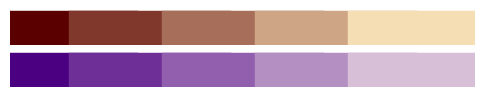

In [291]:
def make_brown_and_purple_color_array(num_colors):
    start_color = np.array([90, 0, 0])  # Maroon (RGB: 128, 0, 0)
    end_color = np.array([245, 222, 179])  # Wheat (RGB: 245, 222, 179)
    colors_brown = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    start_color = np.array([75, 0, 130])  # Indigo (RGB: 75, 0, 130)
    end_color = np.array([216, 191, 216])  # Thistle (RGB: 216, 191, 216)
    colors_indigo_thistle = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    # Convert RGB arrays to hex color codes
    colors_indigo_thistle_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_indigo_thistle]
    colors_brown_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_brown]
    return colors_brown_hex, colors_indigo_thistle_hex

colors_brown_hex, colors_indigo_thistle_hex=make_brown_and_purple_color_array(5)

fig, (ax,axP)= plt.subplots(2,1, figsize=(6, 1))
for i, color in enumerate(colors_brown_hex):
    ax.axhline(0, i / 5, (i + 1) / 5, color=color, linewidth=50)
ax.axis('off')
for i, color in enumerate(colors_indigo_thistle_hex):
    axP.axhline(0, i / 5, (i + 1) / 5, color=color , linewidth=50)
axP.axis('off')
plt.show()


In [292]:
def write_values_in_barh(ax):
    prev_width = 0
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        
        if width <1.5:
            continue

        # Get the color of the bar
        r, g, b, a = p.get_facecolor()

        # Calculate the luminance of the color
        luminance = 0.299*r + 0.587*g + 0.114*b

        # Choose the text color based on the luminance
        text_color = 'white' if luminance < 0.5 else 'black'
        ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color=text_color)
        prev_width = width

In [293]:
dfSectorSeasonalFWcomp['2013':'2023']

Summer Liquid Runoff Ice Sheet  Summer Liquid Runoff Ice Caps  \
       Basins                                                                  
2013.0 SE                           34.617302                      13.951906   
       SW                           60.289978                       8.540026   
       CE                           56.523918                      11.277893   
       CW                           55.148003                       5.372565   
       NE                           43.768459                      14.820007   
...                                       ...                            ...   
2022.0 CE                           50.332199                       9.766074   
       CW                           60.054878                       4.499894   
       NE                           34.002495                      10.894258   
       NW                           39.737389                       3.091695   
       NO                           29.675182                      12.510793   

               Summer Liquid Runoff Tundra  Summer Precipitation Fjords  \
       Basins                                                             
2013.0 SE                        19.491568                     5.448102   
       SW                        32.384472                     5.405826   
       CE                        17.618881                     6.378761   
       CW                        17.101084                     2.872219   
       NE                        19.887516                     4.315382   
...                                    ...                          ...   
2022.0 CE                        20.781933                     4.976133   
       CW                        21.490803                     4.280931   
       NE                        28.240089                     2.808761   
       NW                         5.403870                     1.437664   
       NO                        16.421600                     1.877858   

               Summer Solid Ice discharge (weighted mean)  \
       Basins                                               
2013.0 SE                                       11.799496   
       SW                                        1.644106   
       CE                                        6.583571   
       CW                                        8.095149   
       NE                                        2.228478   
...                                                   ...   
2022.0 CE                                        7.364868   
       CW                                        7.233343   
       NE                                        2.604965   
       NW                                        9.524197   
       NO                                        2.263469   

               Winter Liquid Runoff Ice Sheet  Winter Liquid Runoff Ice Caps  \
       Basins                                                                  
2013.0 SE                            1.572778                       0.562670   
       SW                            1.865695                       0.142876   
       CE                            0.587895                       0.131856   
       CW                            0.164542                       0.034082   
       NE                            0.050548                       0.077491   
...                                       ...                            ...   
2022.0 CE                            0.677519                       0.145094   
       CW                            0.034347                       0.043773   
       NE                            0.047308                       0.081582   
       NW                            0.056563                       0.001804   
       NO                            0.011158                       0.005557   

               Winter Liquid Runoff Tundra  Winter Precipitation Fjords  \
       Basins                                                             
2013.0 SE    

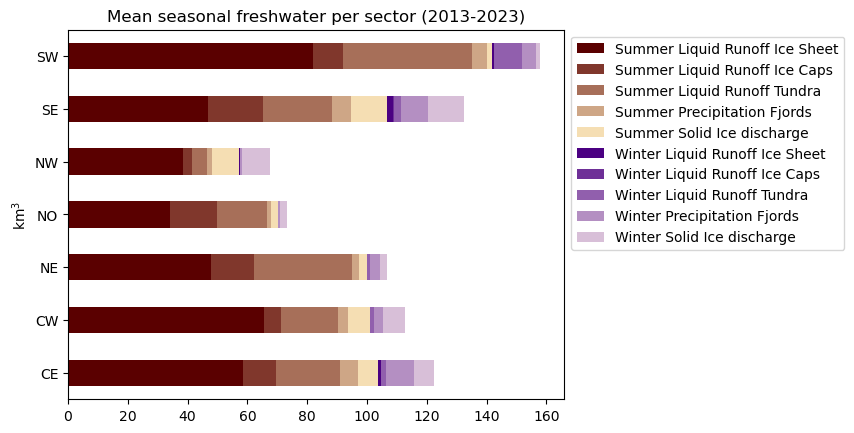

In [294]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_hex =  colors_brown_hex +colors_indigo_thistle_hex

fig,ax = plt.subplots(1, 1,)
dfSectorSeasonalFWcomp['2013':'2023'].groupby('Basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson].plot(kind='barh', stacked=True, ylabel="km$^3$", legend=True, ax=ax, color=colors_hex)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")


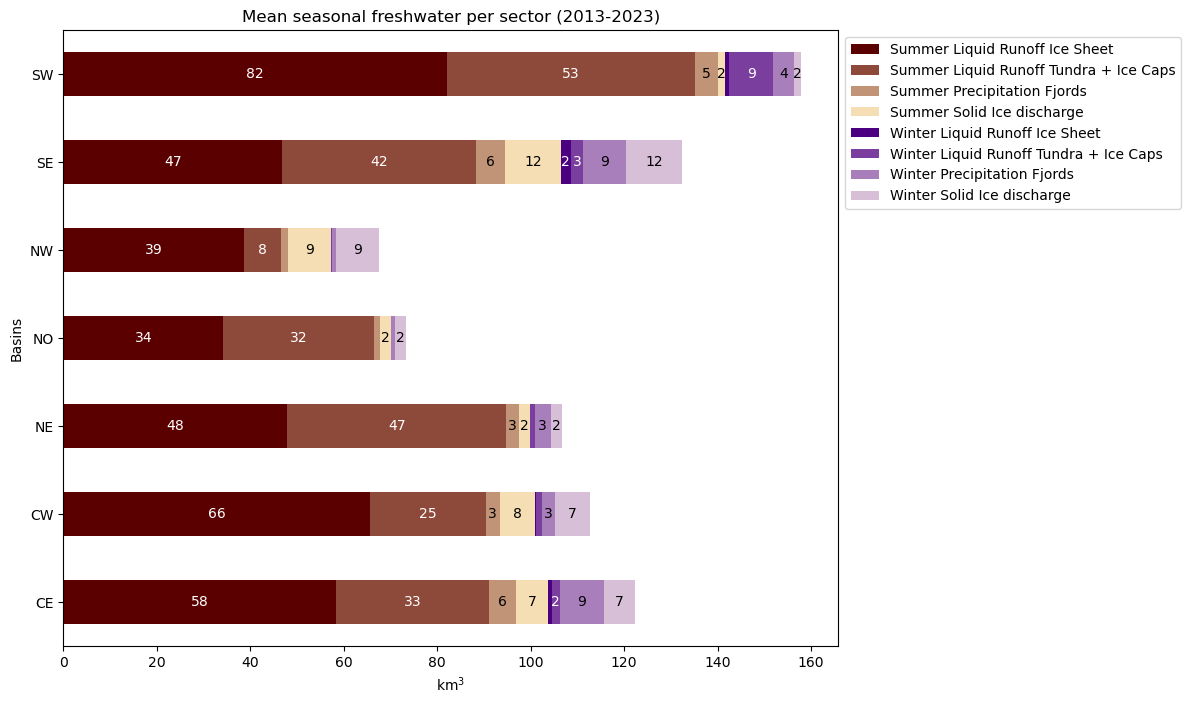

In [295]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_brown_hex4, colors_indigo_thistle_hex4=make_brown_and_purple_color_array(4)
colors_hex4 =  colors_brown_hex4 +colors_indigo_thistle_hex4

# fig,ax = plt.subplots(1, 1,figsize=(5, 8)) 
fig,ax = plt.subplots(1, 1,figsize=(10,8))
# make a local variable
dfSectorSeasonalFWcomp_4_only =dfSectorSeasonalFWcomp['2013':'2023'].groupby('Basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson]
dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only=dfSectorSeasonalFWcomp_4_only.loc[:,['Winter Solid Ice discharge', 'Winter Precipitation Fjords', 'Winter Liquid Runoff Tundra + Ice Caps', 'Winter Liquid Runoff Ice Sheet', 'Summer Solid Ice discharge', 'Summer Precipitation Fjords', 'Summer Liquid Runoff Tundra + Ice Caps', 'Summer Liquid Runoff Ice Sheet'][::-1]]
# dfSectorSeasonalFWcomp_4_only = dfSectorSeasonalFWcomp_4_only.div(dfSectorSeasonalFWcomp_4_only.sum(axis=1), axis=0)

dfSectorSeasonalFWcomp_4_only.plot(kind='barh', stacked=True, xlabel="km$^3$", legend=True, ax=ax, color=colors_hex4)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")
write_values_in_barh(ax)

Text(0.5, 0, 'km$^3$ w.e. per year')

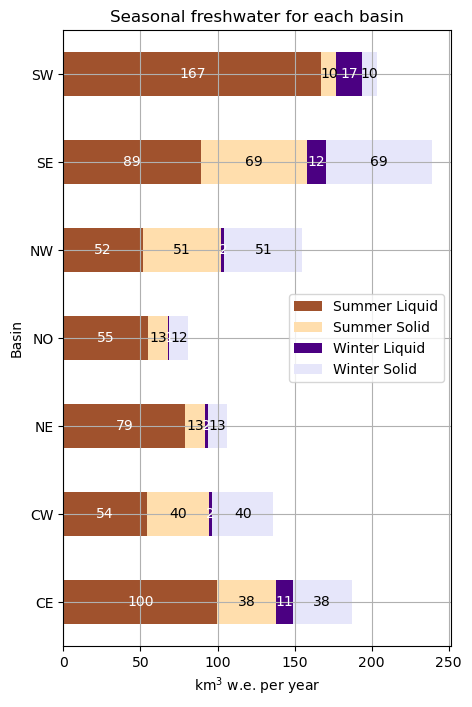

In [ ]:
colors_seasons = ['sienna', 'navajowhite', 'indigo', 'lavender']

# Create the bar plot and get the returned Axes object
ax = dfSectorSeasonalSum.groupby('Basin').mean().div(
    1
    # dfSectorSeasonalSum.groupby('Basin').mean().sum(axis=1), axis=0
    ).loc[basinorderkarlsson].plot(kind='barh', stacked=True, figsize=(5, 8), color=colors_seasons, title="Seasonal freshwater for each basin")
write_values_in_barh(ax)

plt.grid()

# km 3 w.e.
plt.xlabel("km$^3$ w.e. per year")

In [568]:
dsMonthlyGr

# import 
ds_runoff_tundra2023 = xr.open_dataset(f"{pathDataTemp}runoff_tundra.2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.tundra.nc")

xr.concat([dsMonthlyGr['Liquid Runoff Tundra'], ds_runoff_tundra2023], dim='time')